In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
# matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import matplotlib.gridspec as gridspec
import spectral_analysis as sa

# Max-No dm15 Match

In [3]:
%matplotlib inline

In [4]:
# query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 14 and 18",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 13",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]
query_host_max = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18",
                  "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]

In [64]:
comps_host_max, sn_arrays_host_max, og_sn_arrays_host_max, boot_sn_arrays_host_max = query_db.main(len(query_host_max), query_host_max, boot='b', medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18
['-12 SELECT', '123.png.dat', '17.000000', '53.000000', '596RF Multi-plots.py', 'add_maguire_data.py', 'add_ryan_hst_data.py', 'add_ryan_hst_data.pyc', 'add_swift_uv_data.py', 'add_swift_uv_data.pyc', 'Andres_Telluric.ipynb', 'badfiles.txt', 'bootstrap.py', 'build_event_table.py', 'build_event_table.pyc', 'build_kaepora.py', 'build_phot_db', 'build_phot_db.py', 'build_phot_db.pyc', 'build_spectral_table.py', 'build_spectral_table.pyc', 'Carbon_EW.ipynb', 'check.py', 'checked_csp_0-11', 'checked_other_0-0', 'checked_other_0-7', 'checkUI.py', 'Color_dm15.ipynb', 'composite plot.png', 'composite.py', 'composite.pyc', 'composite_conflicts.py', 'createdb.py', 'cross_correlate.py', 'database_revisions.txt', 'datafidelity.py', 'datafidelity.pyc', 'data_notes.txt', 'data_notes_csp_other.txt', 'db_maintenance.py', 'db_maintenance.pyc', 'debug_failed_spectr

composite.py:1215: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1252: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


KeyboardInterrupt: 

In [6]:
dmlate = []
dmearly = []
for s in sn_arrays_host_max[0]:
    dmlate.append(np.nanmean(s.dm15_array))
for s in sn_arrays_host_max[1]:
    dmearly.append(np.nanmean(s.dm15_array))
print np.average(dmlate), np.average(dmearly)

1.09776143037 1.47312882951


Phase:  0.297864602844
dm15:  1.09226591033
Redshift:  0.0129290910405
Morphology:  12.5901458103
Phase:  0.0436236985333
dm15:  1.3746852981
Redshift:  0.0120101524127
Morphology:  5.2103955279


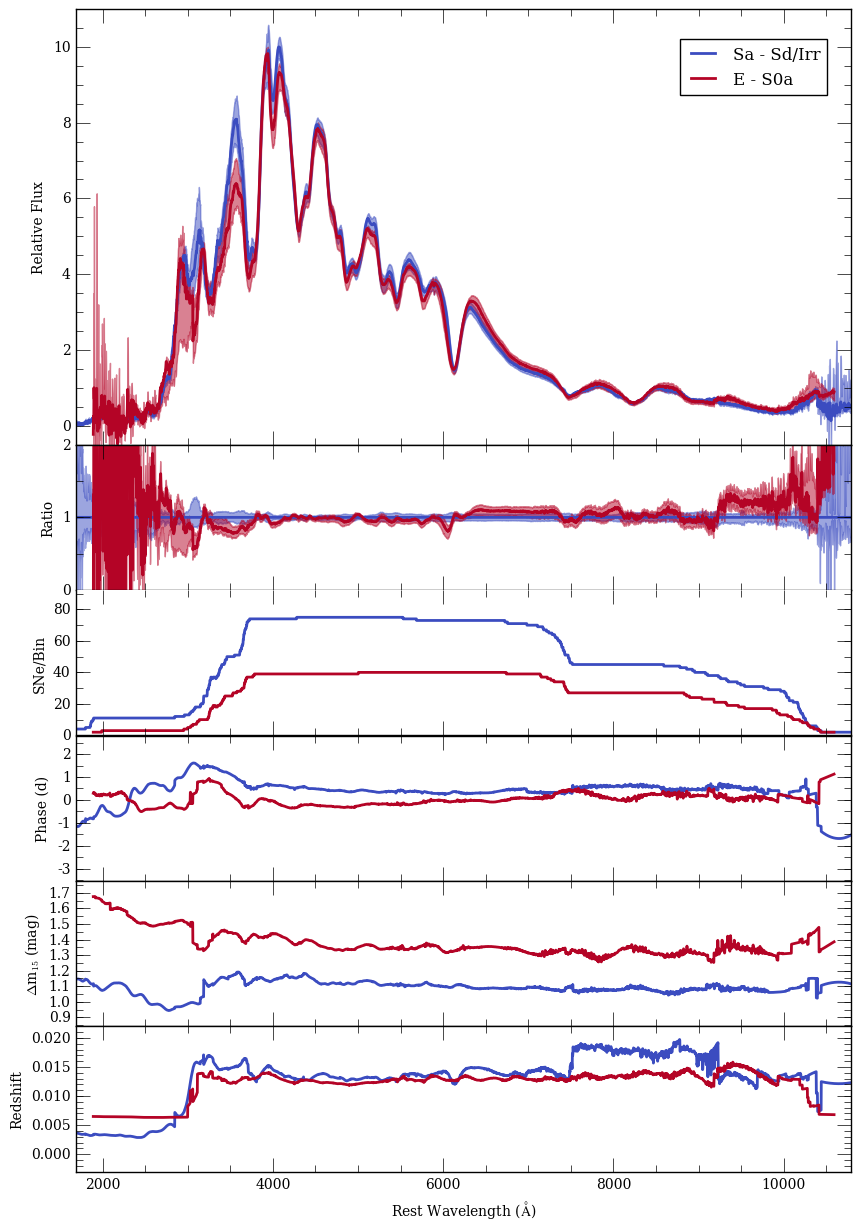

In [7]:
query_db.set_min_num_spec(comps_host_max, 1)
# query_db.comparison_plot(comps_host_max, scale_type=True)
query_db.comparison_plot(comps_host_max, scale_type=False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/all_dm15_host_max')
# query_db.stacked_plot(comps_host_max)

# Max-Mid dm15 Matched

In [3]:
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Supernovae.SN != '1999ac'",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]
query_host_match_p0 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'",
                       "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [9]:
# comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_match_p0, sn_arrays_match_p0, boot_sn_arrays_match_p0 = query_db.main(len(query_host_match_p0), query_host_match_p0, boot='b', medmean=1, verbose=False, gini_balance=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.5) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.5)) and Spectra.SN != '1999ac'
74 Total Spectra found
105 questionable files currently ignored
(4, 'questionable spectra removed', 70, 'spectra left')
(0, 'Peculiar Ias removed', 70, 'spectra left')
57 valid spectra found
Arrays cleaned
5 spectra may have telluric contamination
16 total SNe
removed SNe without host corrections
Using 46 spectra of 15 SNe
Gini balancing...
Balanced after 9 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -2 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
60 Total Spectra found
105 questionable files currently

Phase:  0.59440619277
dm15:  1.30330526748
Redshift:  0.017807316828
Morphology:  11.3600343101
Phase:  0.391655432465
dm15:  1.29166966763
Redshift:  0.0154304342108
Morphology:  6.6204458155


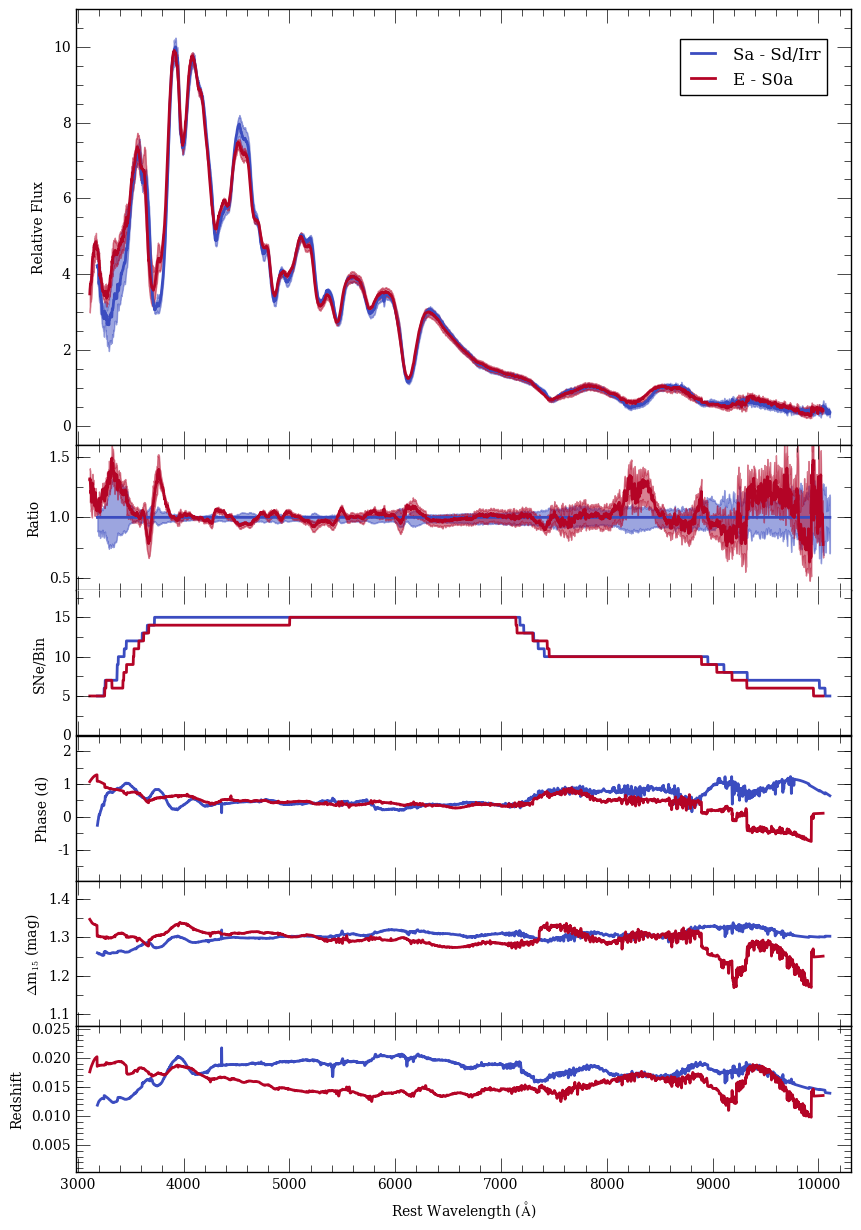

In [10]:
# composite.optimize_scales(comps_host_low_dm15, comps_host_low_dm15[0], True)
query_db.set_min_num_spec(comps_host_match_p0, 1)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= True)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_max')
# query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/host_max_dm13')
query_db.comparison_plot(comps_host_match_p0, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True)

In [11]:
# diff_p0, err_p0, means_p0, varis_p0, EWs_p0 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=7600., w2=8200., w3=9000.)

In [3]:
# diff_p0_hk, err_p0_hk, means_p0_hk, varis_p0_hk, EWs_p0_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p0, w1=3400., w2=3700., w3=4000.)

In [54]:
# query_host_mid_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp' and Supernovae.SN != '2008hv' and Supernovae.SN != '2002dj' and Supernovae.SN != '1994d'"]
query_host_match_m3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))"]

In [4]:
comps_host_match_m3, sn_arrays_match_m3, og_sn_arrays_match_m3, boot_sn_arrays_match_m3 = query_db.main(len(query_host_match_m3), query_host_match_m3, boot=True, medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= 0 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
../data/kaepora_v1.db
67 Total Spectra found
2 flagged spectra removed 65 spectra left
0 spectra of peculiar Ias removed 65 spectra left
51 spectra of SNe with that have host reddening corrections
Arrays cleaned
8 spectra may have telluric contamination


composite.py:1223: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if template.RMSE != None:
composite.py:1260: RuntimeWarning: divide by zero encountered in divide
  error = 1./np.sqrt(template.ivar)


13 total SNe
removed spectra of SNe with A_V > 2.0

Using 40 spectra of 12 SNe


gini.py:43: RuntimeWarning: invalid value encountered in absolute
  g_diff = np.absolute(g_wi - g_wj)
gini.py:48: RuntimeWarning: invalid value encountered in double_scalars
  gini_coeffs.append(gini_num/gini_denom)


Gini balancing...
Balanced after 5 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -5 and phase <= 0 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.5) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.5))
../data/kaepora_v1.db
36 Total Spectra found
3 flagged spectra removed 33 spectra left
0 spectra of peculiar Ias removed 33 spectra left
30 spectra of SNe with that have host reddening corrections
Arrays cleaned
3 spectra may have telluric contamination
12 total SNe
removed spectra of SNe with A_V > 2.0

Using 30 spectra of 12 SNe
Gini balancing...
Balanced after 8 iterations
Bootstrapping
scaling boots...
computing confidence intervals...


Phase:  -2.43993386481
dm15:  1.27901352307
Redshift:  0.0156803739685
Morphology:  11.4192559044
Phase:  -2.72604002608
dm15:  1.29386229396
Redshift:  0.0126861004791
Morphology:  5.86249791569


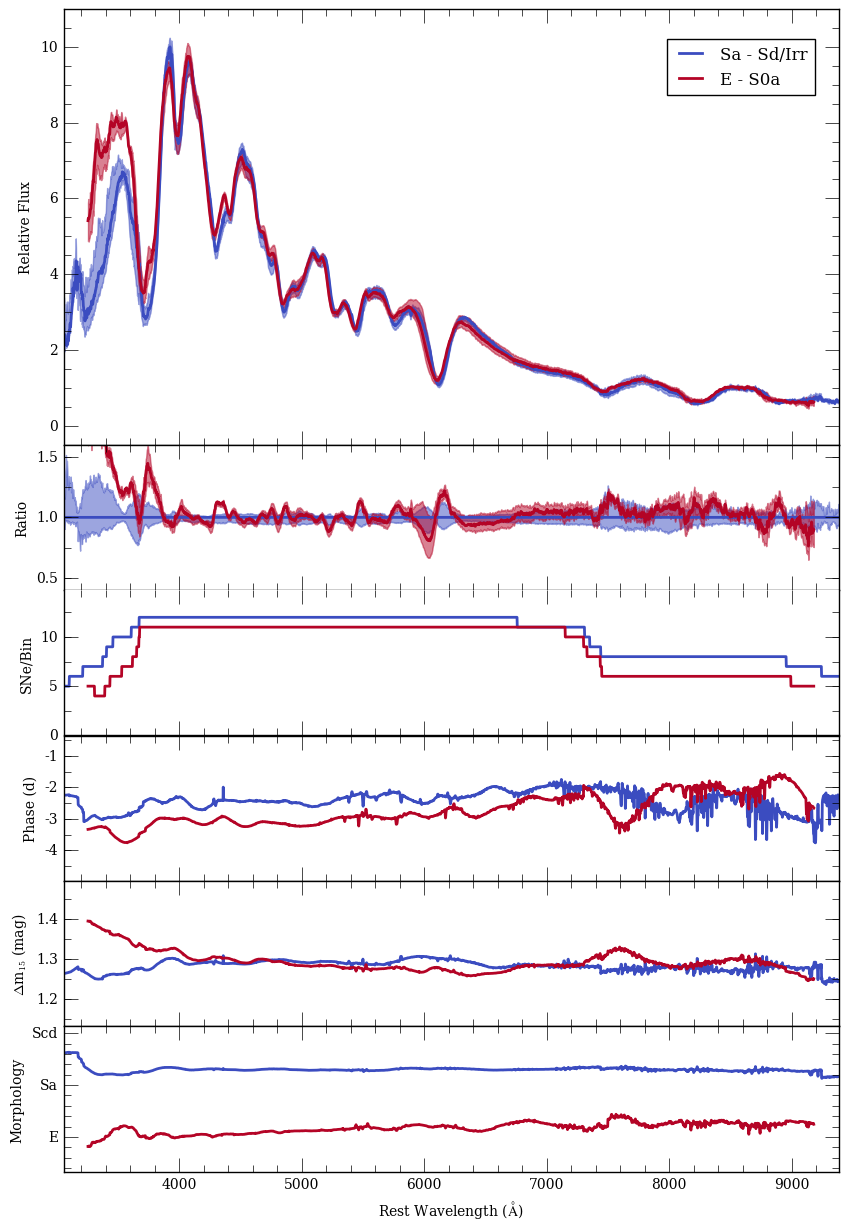

In [5]:
query_db.set_min_num_spec(comps_host_match_m3, 1)
# query_db.comparison_plot(comps_host_match_m3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, morph=True)
query_db.comparison_plot(comps_host_match_m3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'],zoom_ratio=True, morph=True, savename='host_composites_updated/host_m3_dm13')

In [6]:
# diff_m3, err_m3, means_m3, varis_m3, EWs_m3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=7600., w2=8200., w3=9000.)

In [7]:
# diff_m3_hk, err_m3_hk, means_m3_hk, varis_m3_hk, EWs_m3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_m3, w1=3400., w2=3700., w3=4000.)

In [8]:
# query_host_mid_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host >= 10 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Supernovae.SN != '2007bc'",
#                               "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5)) and Supernovae.SN != '1997bp'"]
query_match_p3 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'",
                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))"]

In [9]:
comps_host_match_p3, sn_arrays_match_p3, og_sn_arrays_match_p3, boot_sn_arrays_match_p3 = query_db.main(len(query_match_p3), query_match_p3, boot=True, medmean=1, selection='max_coverage', verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 10 and 18 and ((dm15_source >= 1.2 and dm15_source < 1.45) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.45)) and Spectra.SN != '1999ac'
../data/kaepora_v1.db
55 Total Spectra found
2 flagged spectra removed 53 spectra left
0 spectra of peculiar Ias removed 53 spectra left
44 spectra of SNe with that have host reddening corrections
Arrays cleaned
2 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0

Using 39 spectra of 12 SNe
Gini balancing...
Balanced after 11 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 0 and phase <= 6 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.5) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.5))
../data/kaepora_v1.db
70 Total Spectra found
3

Phase:  2.35050402508
dm15:  1.29632658513
Redshift:  0.0159833955467
Morphology:  10.6183145155
Phase:  2.51941185853
dm15:  1.29210995067
Redshift:  0.0154332634965
Morphology:  6.79929856888


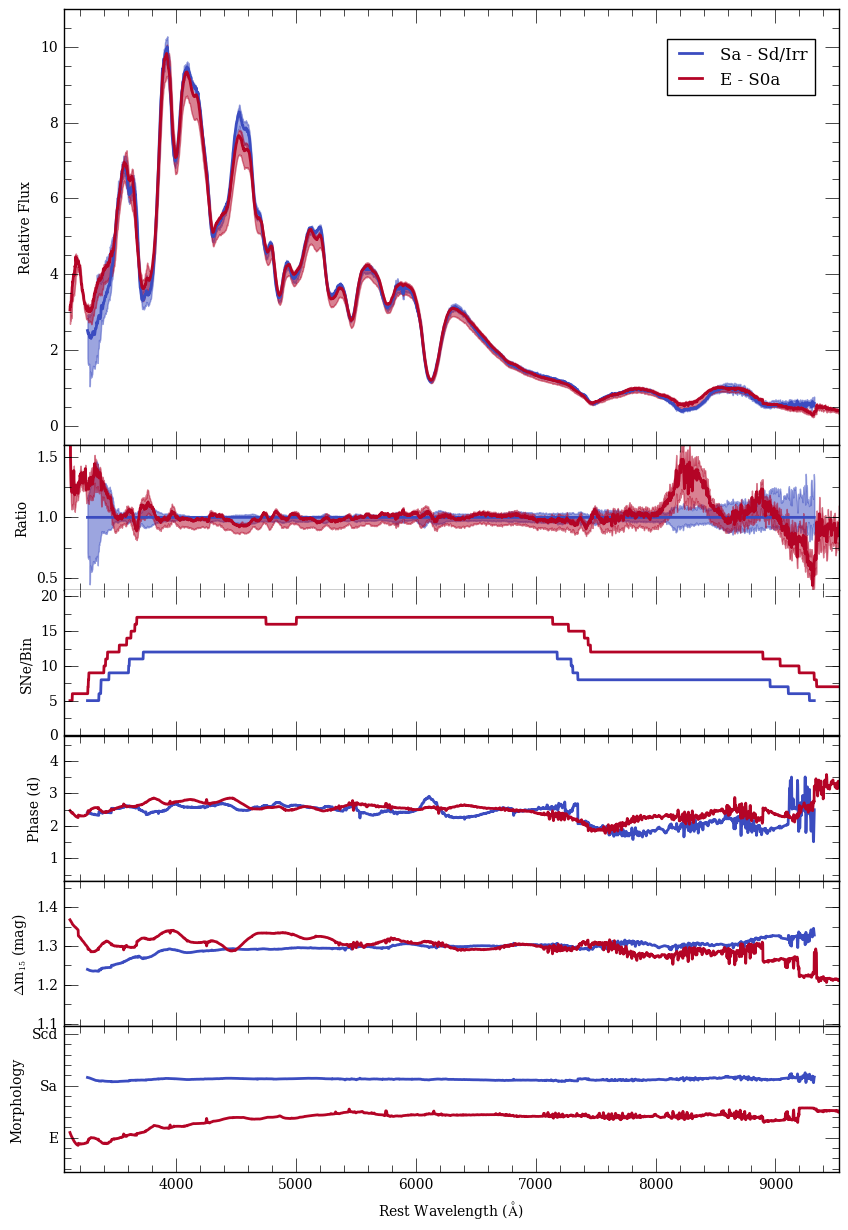

In [10]:
query_db.set_min_num_spec(comps_host_match_p3, 1)
# query_db.comparison_plot(comps_host_match_p3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True)
query_db.comparison_plot(comps_host_match_p3, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True, savename='host_composites_updated/host_p3_dm13')

In [11]:
# diff_p3, err_p3, means_p3, varis_p3, EWs_p3 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=7600., w2=8200., w3=9000.)

In [12]:
# diff_p3_hk, err_p3_hk, means_p3_hk, varis_p3_hk, EWs_p3_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p3, w1=3400., w2=3700., w3=4000.)

In [13]:
# query_host_match_p8 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'",
#                              "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.15 and dm15_source < 1.45) or (dm15_from_fits >= 1.15 and dm15_from_fits < 1.45))"]
query_host_match_p8 = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'",
                             "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.45) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.45))"]

In [14]:
comps_host_match_p8, sn_arrays_match_p8, og_sn_arrays_match_p8, boot_sn_arrays_match_p8 = query_db.main(len(query_host_match_p8), query_host_match_p8, boot=True, medmean=1, verbose=False, gini_balance=True, og_arr=True)

SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 10 and 18 and ((dm15_source >= 1.17 and dm15_source < 1.48) or (dm15_from_fits >= 1.17 and dm15_from_fits < 1.48)) and Spectra.SN != '1999ac'
../data/kaepora_v1.db
58 Total Spectra found
1 flagged spectra removed 57 spectra left
0 spectra of peculiar Ias removed 57 spectra left
53 spectra of SNe with that have host reddening corrections
Arrays cleaned
6 spectra may have telluric contamination
16 total SNe
removed spectra of SNe with A_V > 2.0

Using 35 spectra of 13 SNe
Gini balancing...
Balanced after 6 iterations
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= 6 and phase <= 11 and NED_host between 1 and 9 and ((dm15_source >= 1.1 and dm15_source < 1.45) or (dm15_from_fits >= 1.1 and dm15_from_fits < 1.45))
../data/kaepora_v1.db
42 Total Spectra fo

Phase:  8.35430729041
dm15:  1.27694963452
Redshift:  0.0132544780887
Morphology:  11.0178428427
Phase:  8.09208228466
dm15:  1.25375816897
Redshift:  0.01326689667
Morphology:  6.62956713205


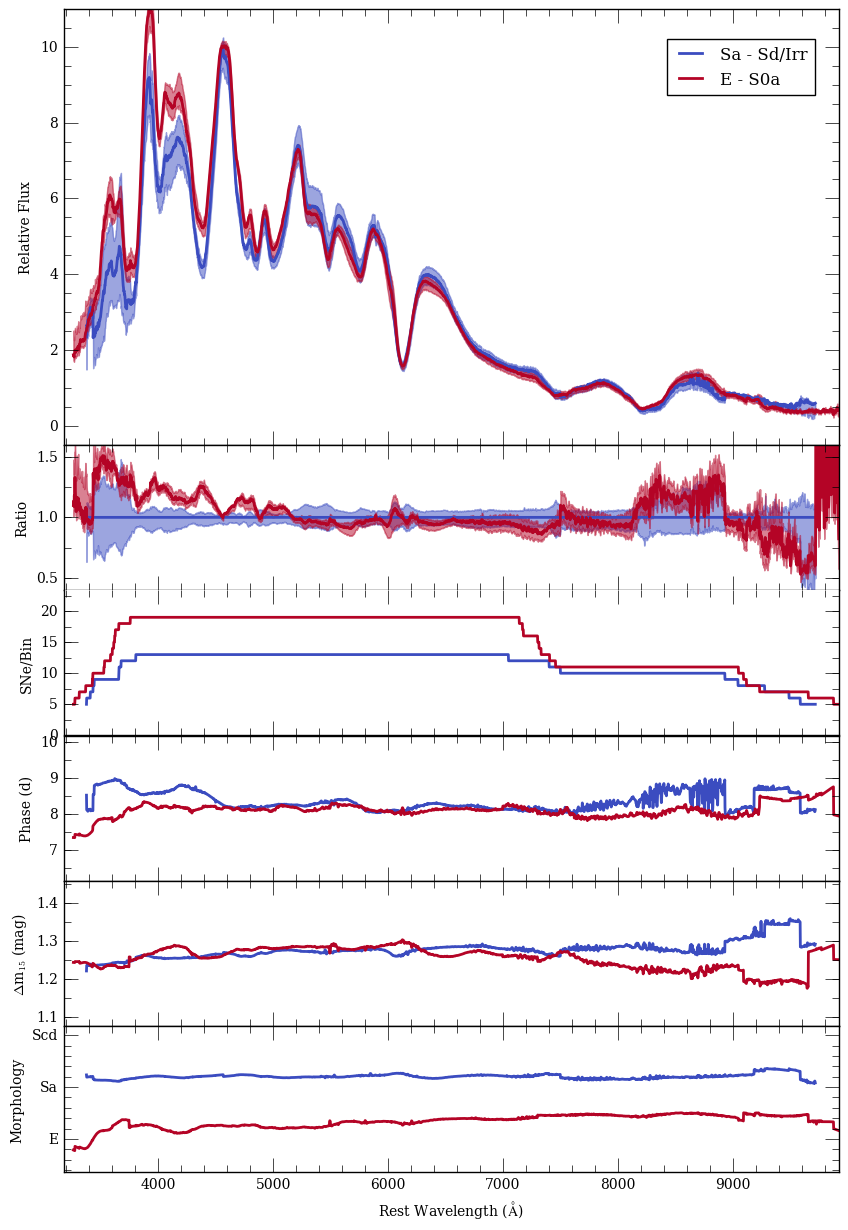

In [15]:
query_db.set_min_num_spec(comps_host_match_p8, 1)
# query_db.comparison_plot(comps_host_match_p8, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True)
query_db.comparison_plot(comps_host_match_p8, scale_type= False, min_num_show=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, morph=True, savename='host_composites_updated/host_p9_dm13')

In [16]:
query_db.save_comps_to_files(comps_host_match_m3, 'siebert_host_morphology')
query_db.save_comps_to_files(comps_host_match_p3, 'siebert_host_morphology')
query_db.save_comps_to_files(comps_host_match_p8, 'siebert_host_morphology')

-2.44 1.28 0.016
../data/S19_Composite_Spectra/siebert_host_morphology_N=12_Nspec=40_phase=m2.44_dm15=1.28_z=0.016.txt
-2.73 1.29 0.013
../data/S19_Composite_Spectra/siebert_host_morphology_N=12_Nspec=30_phase=m2.73_dm15=1.29_z=0.013.txt
2.35 1.3 0.016
../data/S19_Composite_Spectra/siebert_host_morphology_N=12_Nspec=39_phase=p2.35_dm15=1.3_z=0.016.txt
2.52 1.29 0.015
../data/S19_Composite_Spectra/siebert_host_morphology_N=18_Nspec=67_phase=p2.52_dm15=1.29_z=0.015.txt
8.35 1.28 0.013
../data/S19_Composite_Spectra/siebert_host_morphology_N=13_Nspec=35_phase=p8.35_dm15=1.28_z=0.013.txt
8.09 1.25 0.013
../data/S19_Composite_Spectra/siebert_host_morphology_N=19_Nspec=37_phase=p8.09_dm15=1.25_z=0.013.txt


In [17]:
# diff_p8, err_p8, means_p8, varis_p8, EWs_p8 = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=7600., w2=8200., w3=9000.)

In [18]:
# diff_p8_hk, err_p8_hk, means_p8_hk, varis_p8_hk, EWs_p8_hk = sa.measure_comp_diff_EW(boot_sn_arrays_match_p8, w1=3400., w2=3700., w3=4000.)

In [19]:
# plt.plot(boot_sn_arrays_match_p8[1][8].wavelength, boot_sn_arrays_match_p8[1][8].flux)
# plt.show()

In [20]:
# EW_spec_list_late  = og_sn_arrays_match_m3[0] + og_sn_arrays_match_p3[0] + og_sn_arrays_match_p8[0]
# EW_spec_list_early = og_sn_arrays_match_m3[1] + og_sn_arrays_match_p3[1] + og_sn_arrays_match_p8[1]

# mean_EW_late, var_EW_late, EWs_late, err_late, phases_late, morphs_late = sa.measure_EWs(EW_spec_list_late, w1=7600., w2=8200., w3=9000., error=True)
# mean_EW_early, var_EW_early, EWs_early, err_early, phases_early, morphs_early = sa.measure_EWs(EW_spec_list_early, w1=7600., w2=8200., w3=9000., error=True)

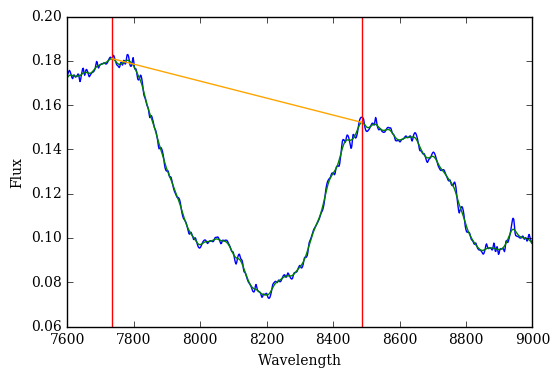

0 228.682378566 5.47085570246 0.713980257739 -4.77607382341


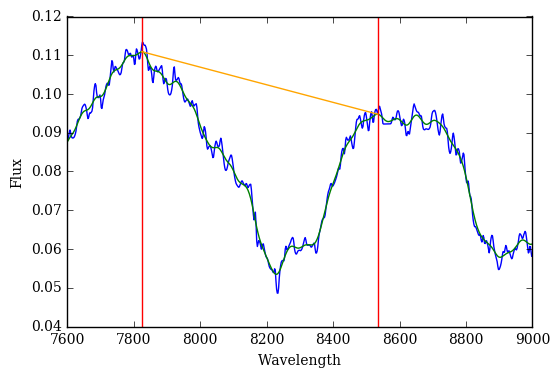

1 148.345369113 4.85354811946 0.882015965701 -0.0433753943234


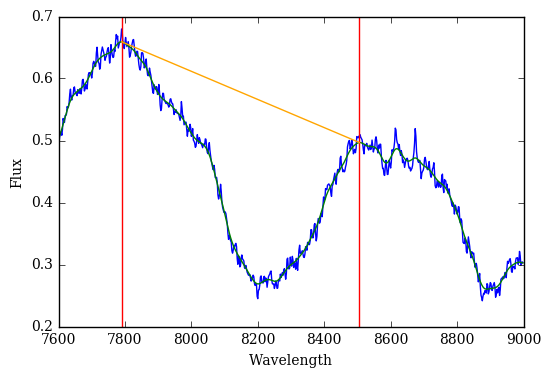

2 180.8280529 9.65686029773 1.13250506975 -5.98898317994


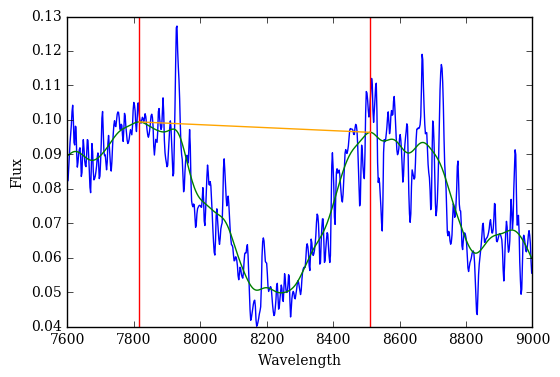

3 172.621012864 2.85521173602 2.39250539125 -1.34909797218


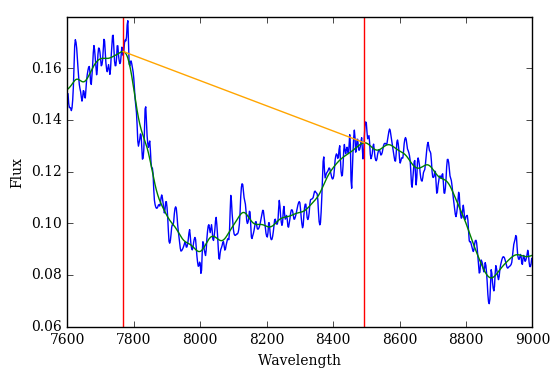

4 188.023055666 7.0292529482 3.63872053454 -5.1019170987


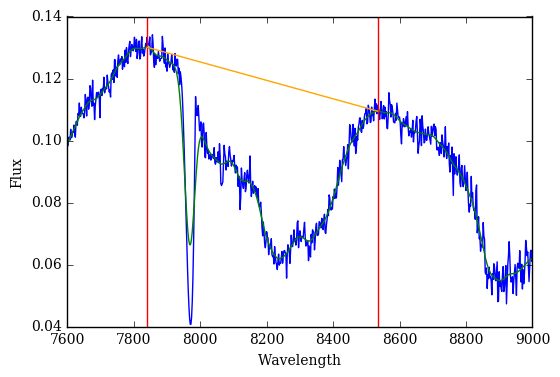

30 172.583663272 5.05897744408 328.078443283 -0.452586206789


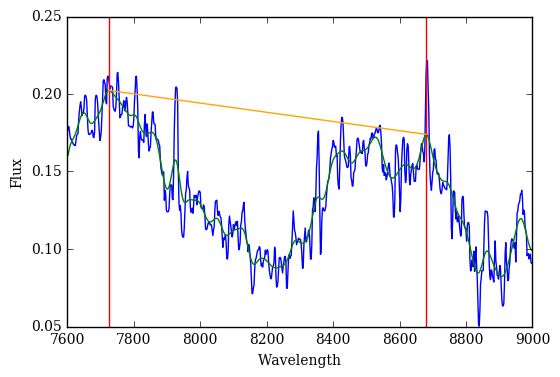

32 244.523598271 10.7231037583 7.255378334 -5.98372545657


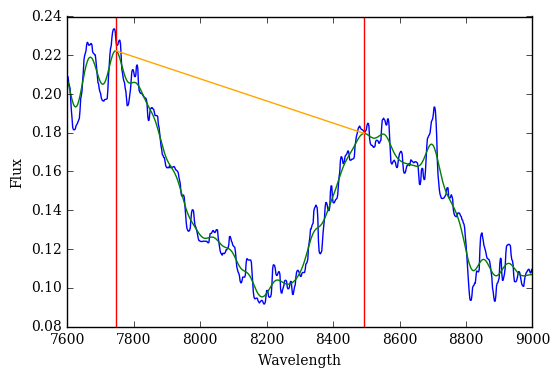

33 219.260974421 6.07050945716 1.32158294981 -4.99222165266


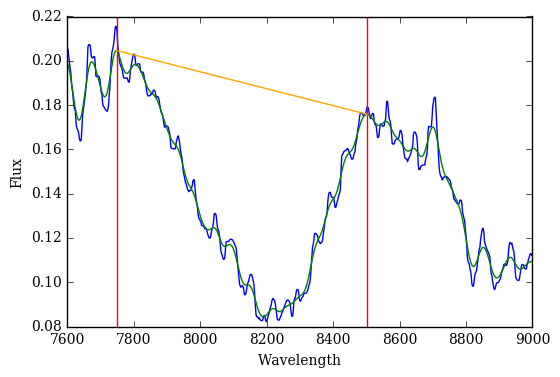

34 217.855065835 5.24747352358 0.645632788725 -4.00071784876


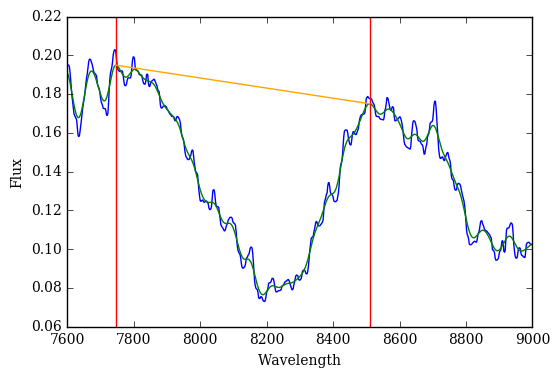

35 216.906009137 5.51439800998 0.709439501994 -3.00921404485


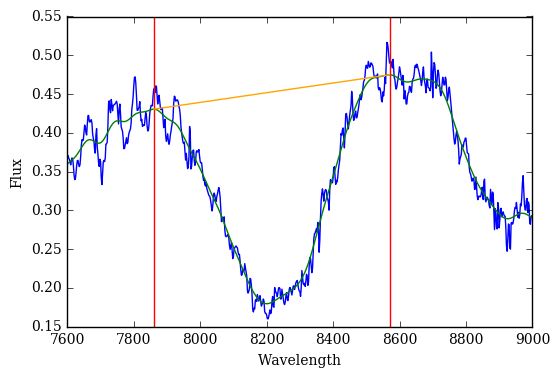

36 207.105256691 3.32609516642 1.10678993531 -1.02620643704


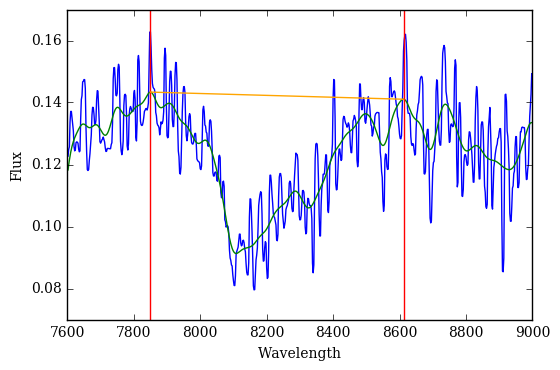

37 121.957968565 3.5897221452 1.87751355441 -0.0347026331401


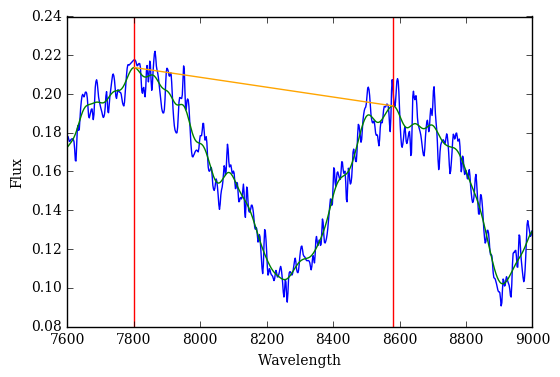

38 169.897183009 4.13004599871 1.55419654813 -2.3


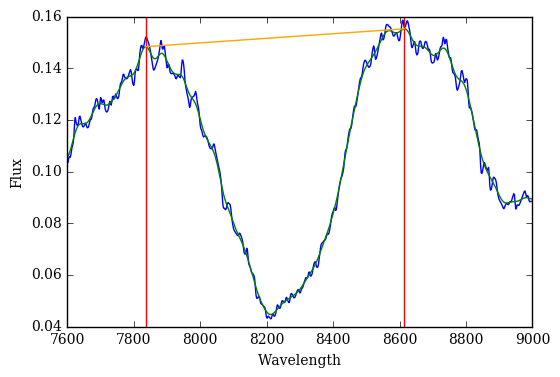

40 256.545292895 3.10800407939 0.580578788845 2.68475189241


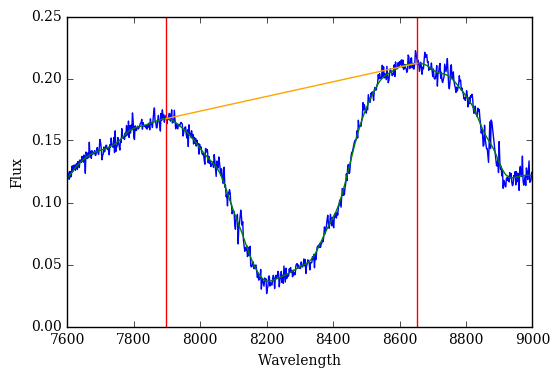

41 288.504122887 6.71317573859 0.826455665832 4.84044973543


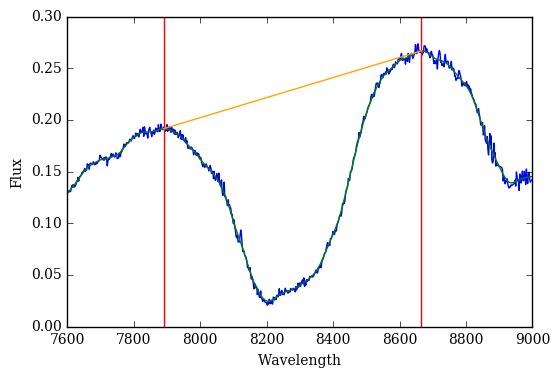

42 324.863641471 7.6028921063 0.602862279006 5.82551679007


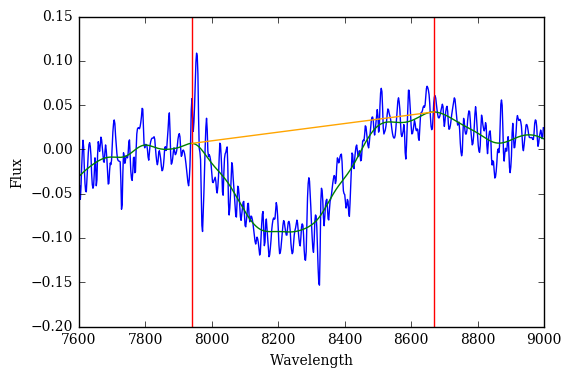

43 2008.80457042 143.422331219 196.450786578 4.15787297081


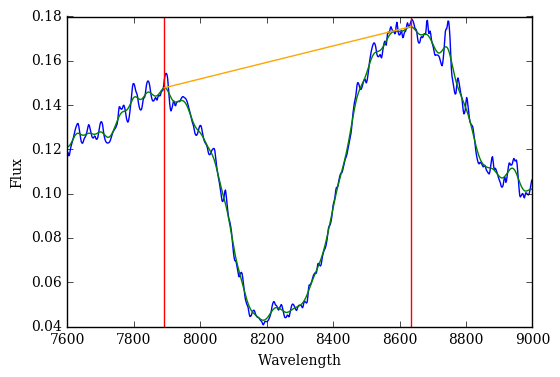

44 262.521017363 4.59073200906 1.07131983143 5.06360992654


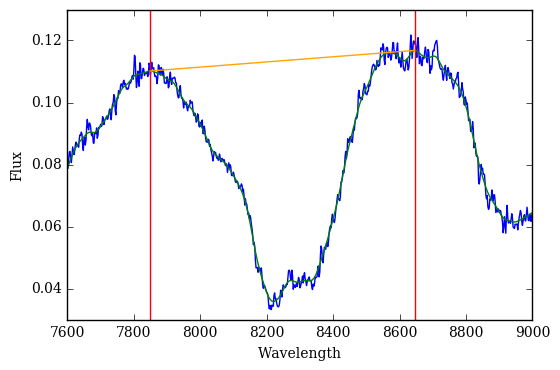

45 233.924486426 2.38037114838 0.868669215594 5.7334384858


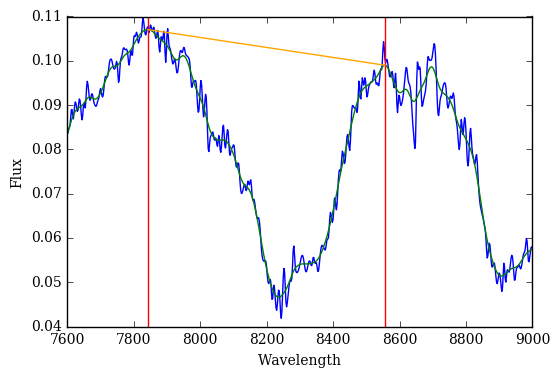

46 175.782245221 4.06739968039 1.08712710542 0.725901253913


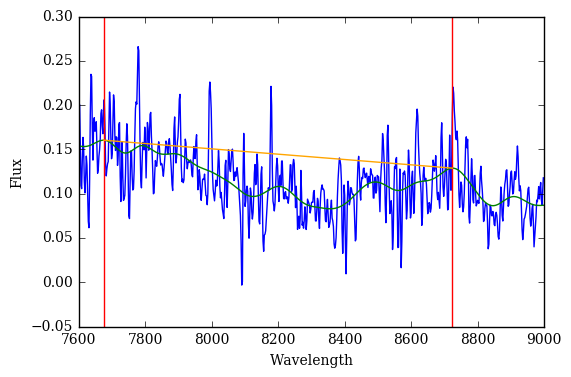

68 208.399515734 9.48595517866 10.2104673437 3.39481175753


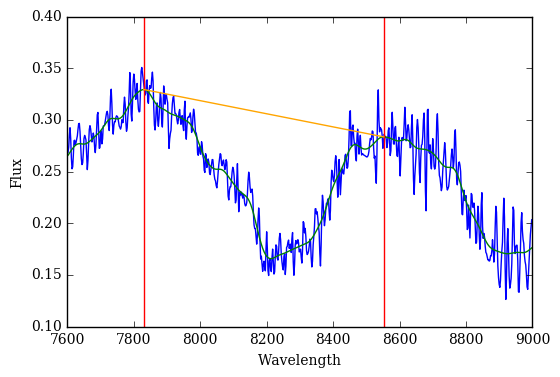

70 148.266892688 4.52731258878 2.87166422414 0.481311692701


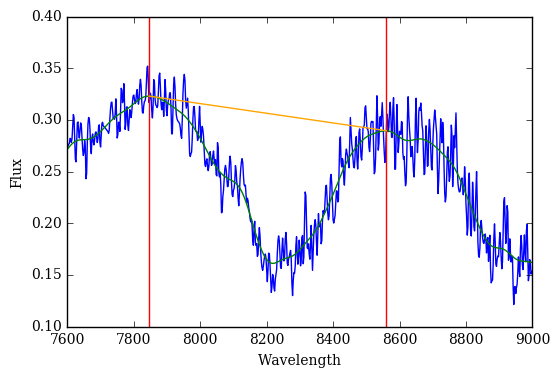

71 148.880815102 3.53267228298 2.62560231128 1.47746908975


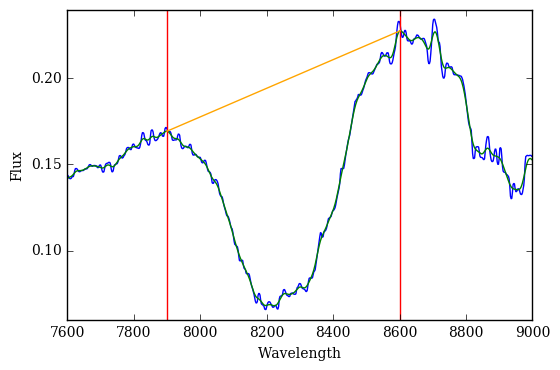

76 233.304192746 7.1410254603 0.305403487647 1.94830497467


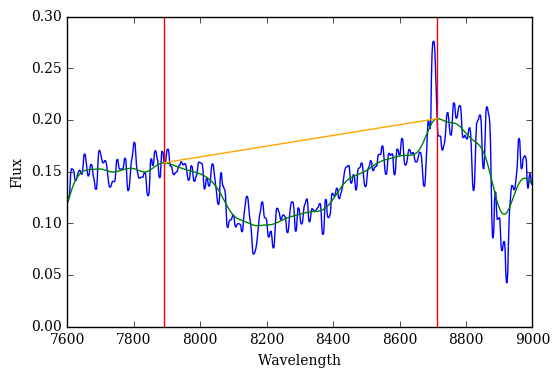

78 200.310114627 7.94483313841 1.49719384839 3.93131258248


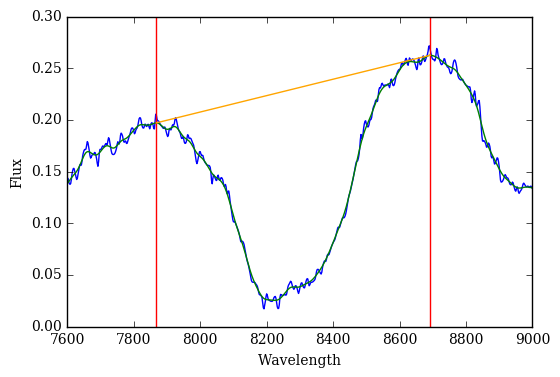

79 336.543352667 7.02012531288 1.122945136 7.70484311474


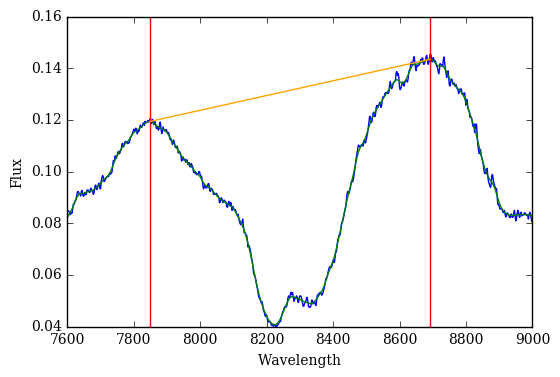

80 257.362703746 5.51865159896 0.529538078452 8.69085173501


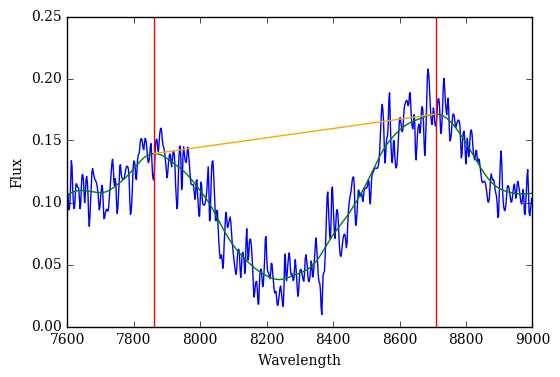

81 317.751305497 6.18796185727 2.94014687919 8.46957036233


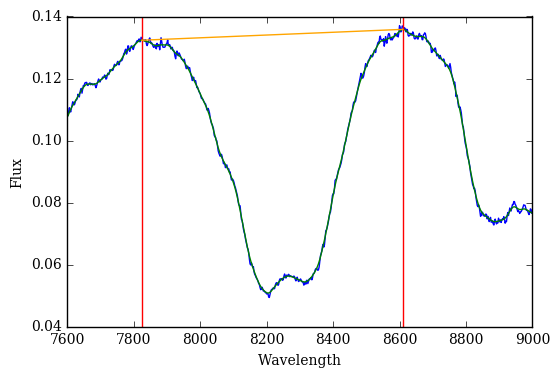

82 222.179002647 1.66325783336 0.363724161753 6.32999933526


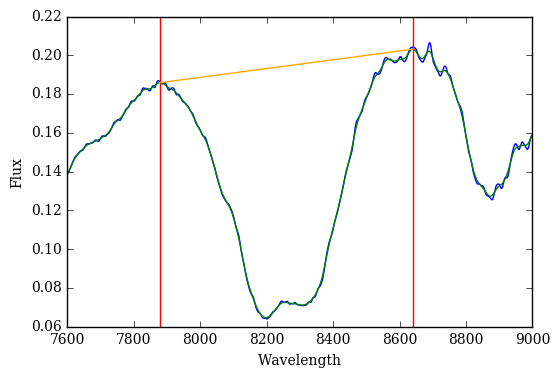

83 243.153589329 3.02429219851 0.306472434539 8.23594427616


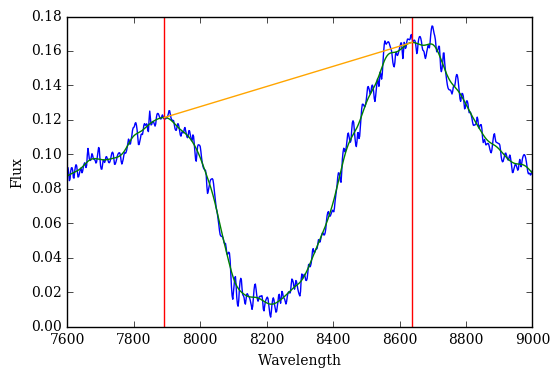

85 342.053647042 7.18455344536 1.24326640996 7.32475422879


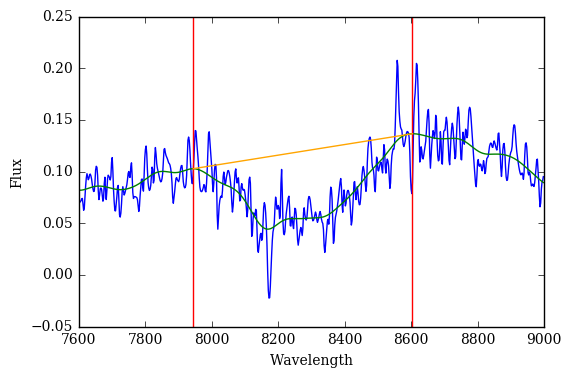

86 222.199881028 8.63045971294 6.42272333387 9.45380189115


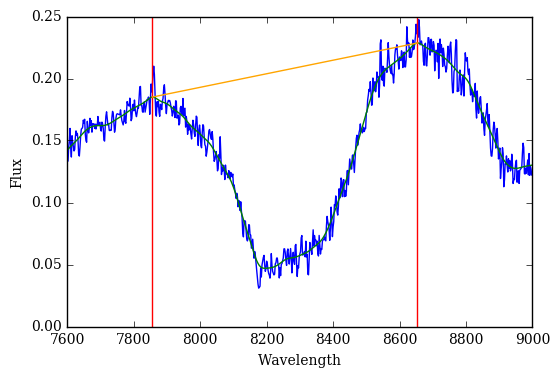

92 301.107355096 7.04395652702 1.90105926374 7.5804759315


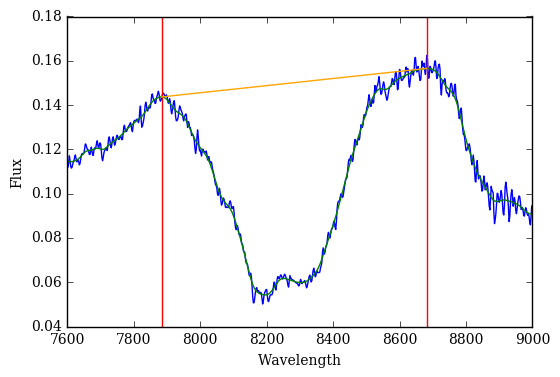

107 238.824984425 4.105498786 0.866258729678 10.08831242


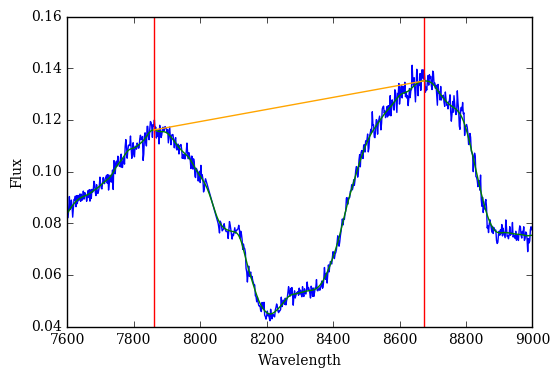

109 246.11542319 4.79873352935 0.95404272059 8.91826359492


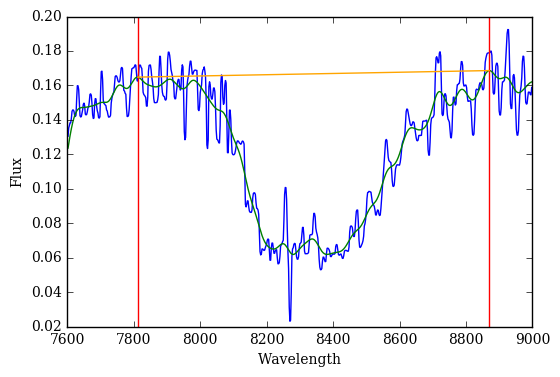

111 308.005822462 3.30093514972 2.32102399514 9.8803354059


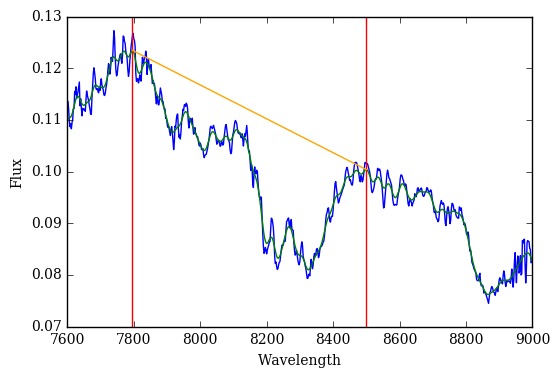

0 72.3123319332 7.82392150667 1.79184501268 -4.11852407745


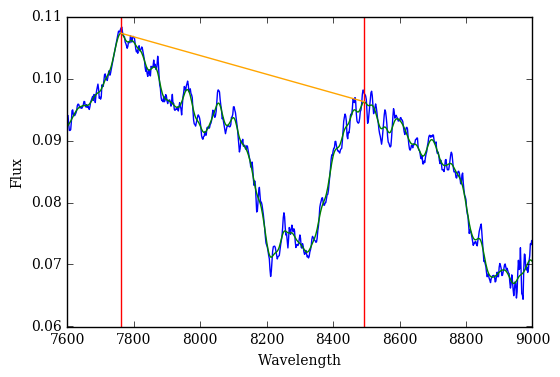

1 90.3147754266 4.35407705394 0.752510544226 -3.57863516883


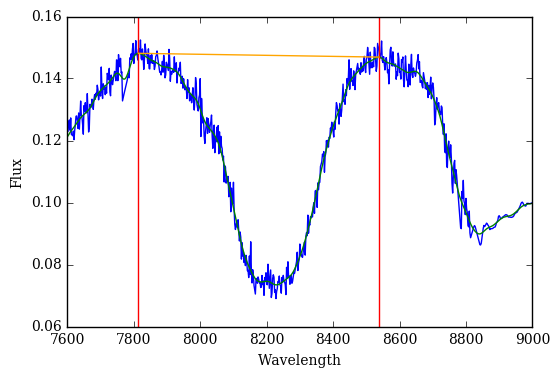

2 158.725951174 1.37791971582 0.674483799184 -1.26102420152


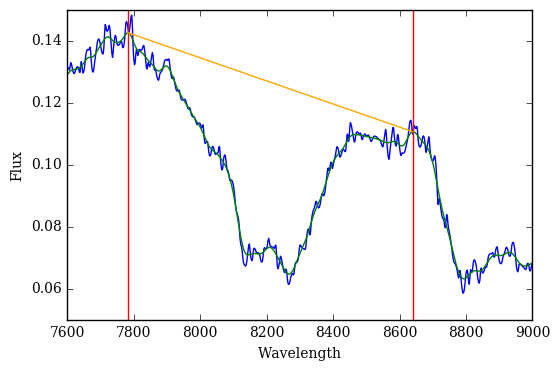

3 170.367239241 9.88494072065 9.98622211931 -0.386103412998


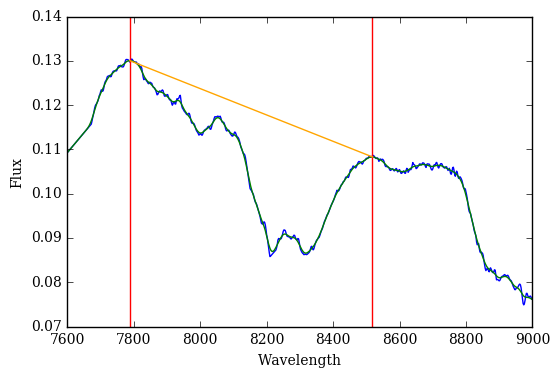

22 75.9805624803 7.33242154263 0.296512023211 -4.57658139549


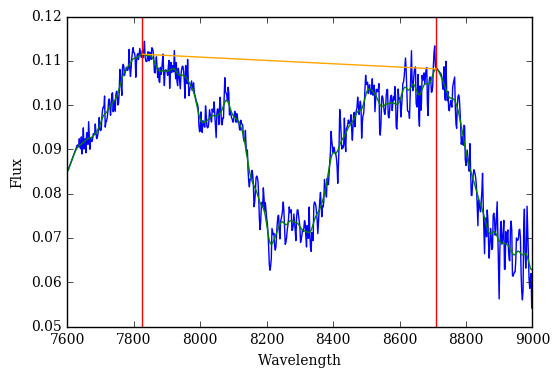

23 127.877636664 3.8582937679 1.64669125831 -2.58068894216


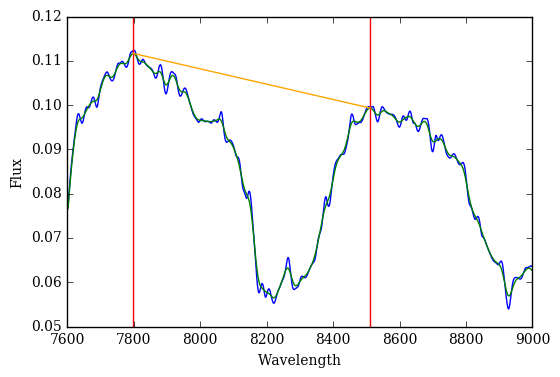

25 132.34124506 5.08602704899 0.563212329385 -1.89285412808


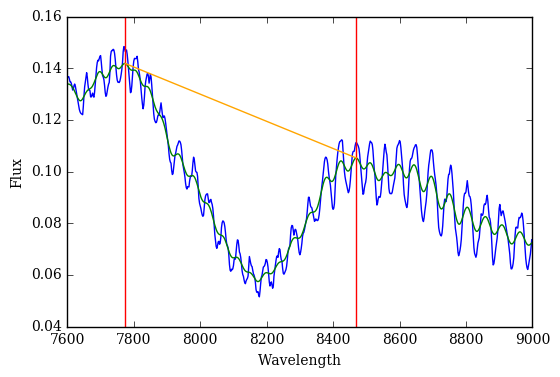

28 184.935132391 9.8848011126 2.49443357221 -4.42741330681


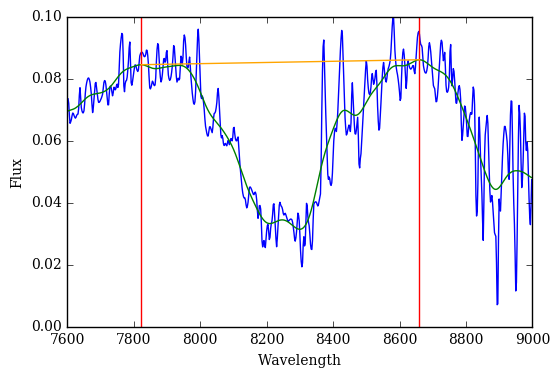

30 209.839289354 1.60544422415 2.57099629717 4.7115224089


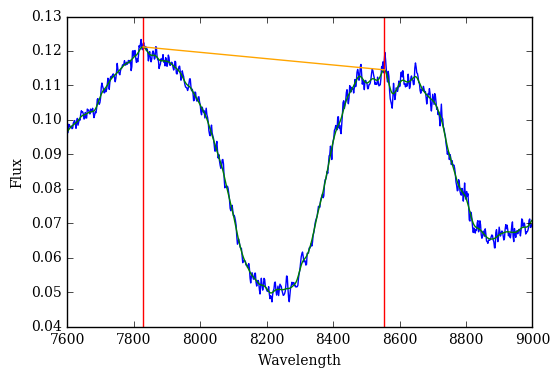

31 187.450350265 2.52834601177 0.649535717887 0.0575854705037


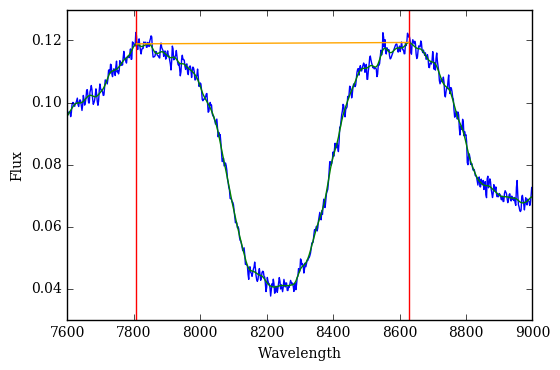

32 225.29167149 2.2971468027 0.980988027191 2.98566024182


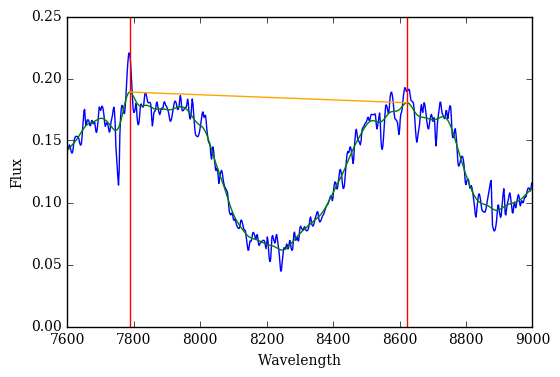

33 253.251893419 5.44692319591 2.37356236355 1.41616176363


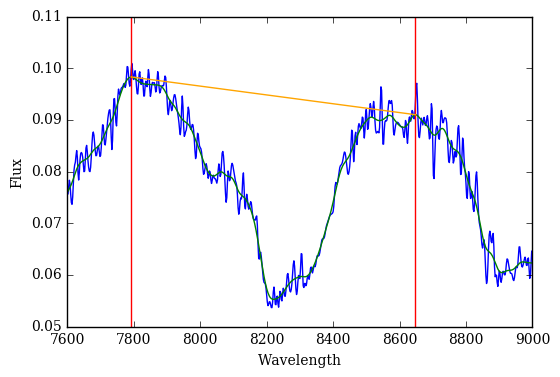

34 134.566062648 2.96850916413 1.89466561828 1.35775586012


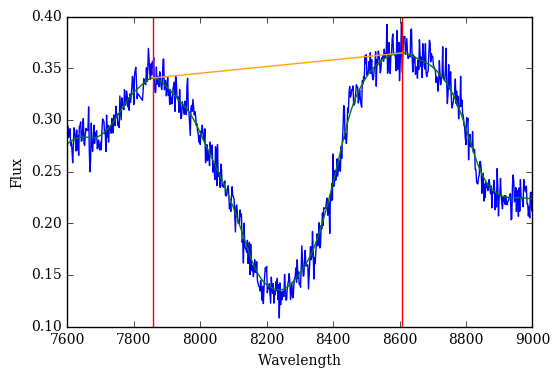

36 214.399512204 2.9440300443 17.899351324 0.663105336289


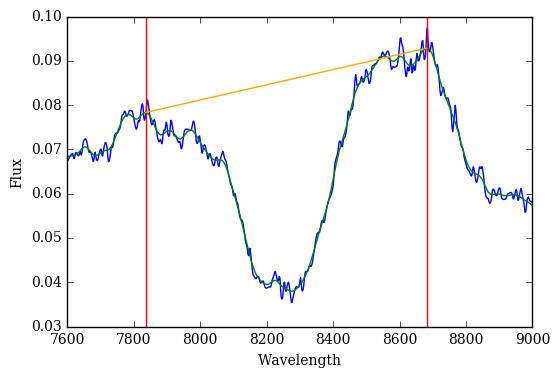

37 185.775747319 6.16158836935 1.29350546909 4.43362917059


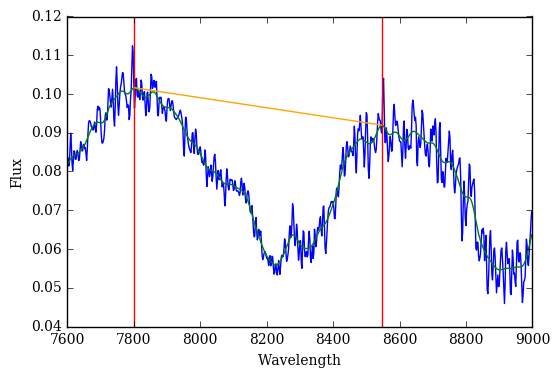

77 141.425460863 3.9108369457 2.12676766387 2.1913273097


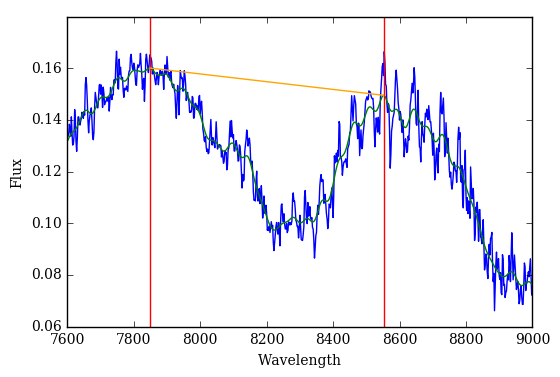

78 125.722817335 3.98591111687 2.09573218307 1.649302898


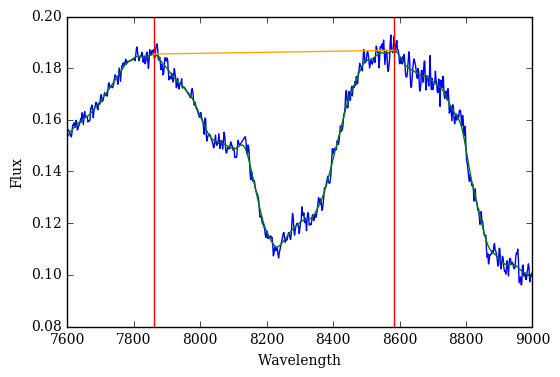

79 132.463563815 1.3238776471 0.510899095242 1.67893109357


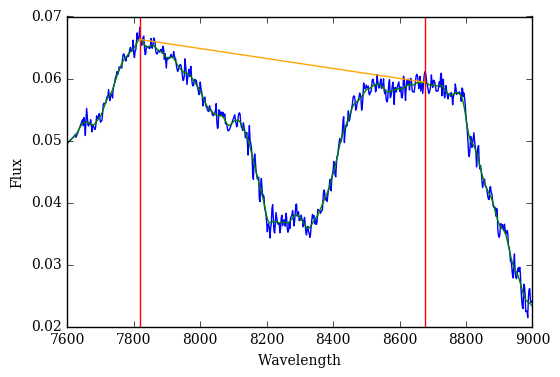

80 144.059341057 3.74836999042 0.874368054617 1.4110959645


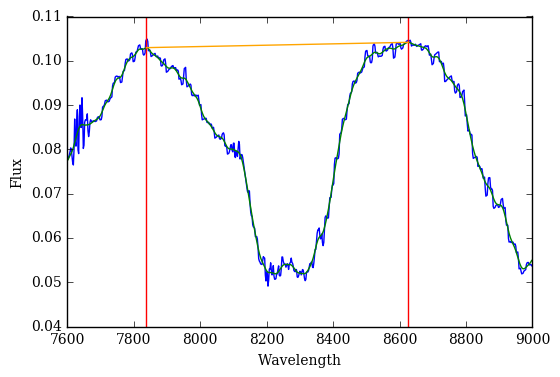

83 170.469139552 1.84303037091 0.619207436075 3.40698841783


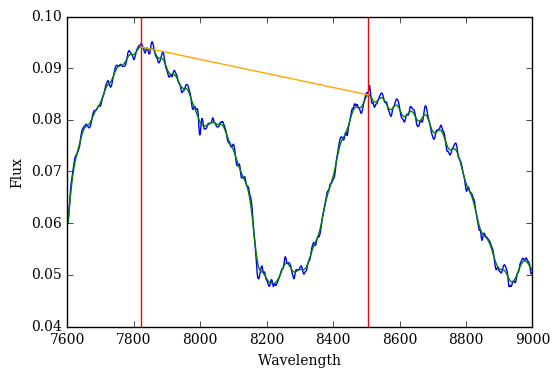

86 137.334329267 3.91390515341 0.548108875351 0.0933516726309


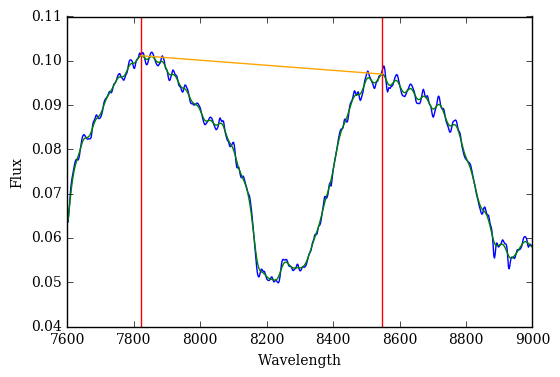

87 150.68827758 2.06465157298 0.481384654388 1.08645457299


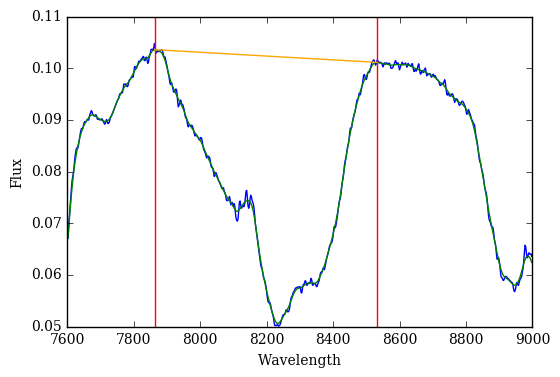

89 170.778999067 2.15640907229 0.286230309873 3.64842750986


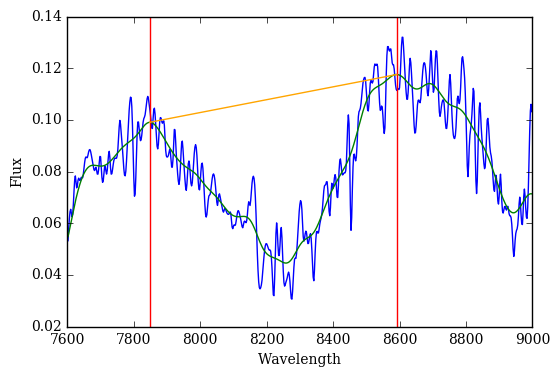

90 226.75558971 6.34256539916 3.22331544257 3.64842750986


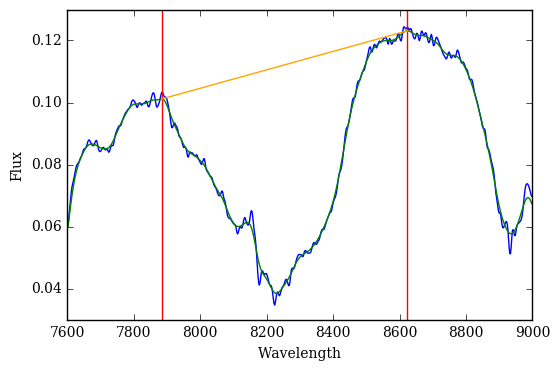

92 231.787104849 7.84763657493 0.49018536232 5.63558846294


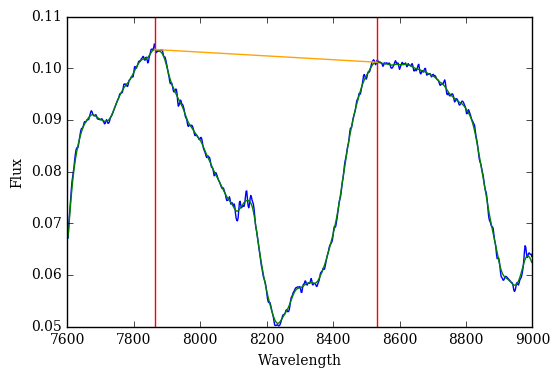

96 170.696784772 2.6551254083 0.298043556209 4.6420079864


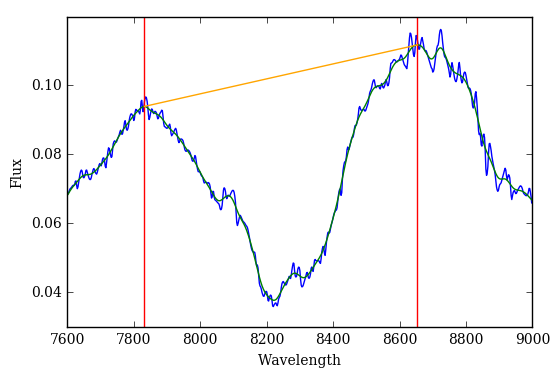

97 239.126889997 5.91882075944 0.793611741499 8.23324235646


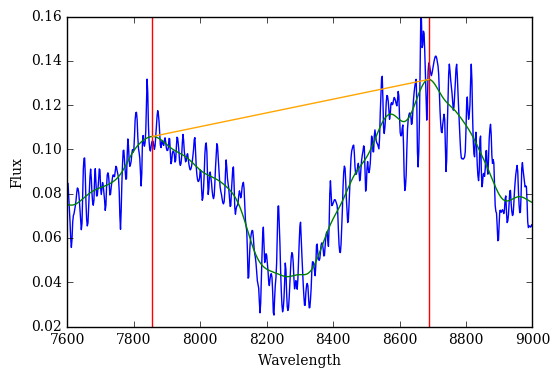

98 255.248469358 6.33674809207 3.58368207012 7.99346943261


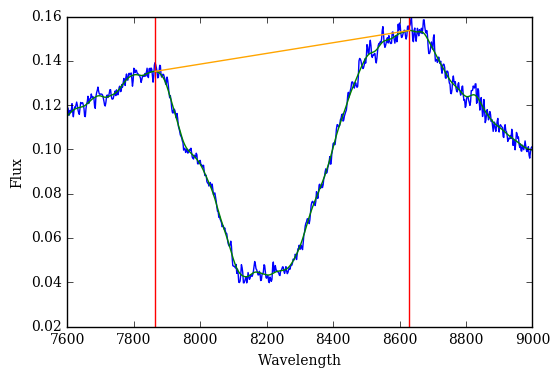

99 273.80461986 6.19394887726 0.88177803878 7.20517073505


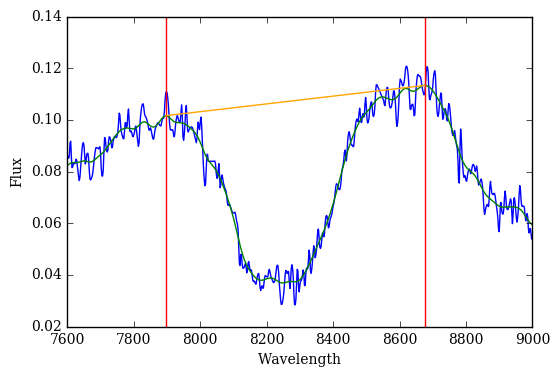

100 228.516945988 3.96453786138 1.701654294 8.40215904325


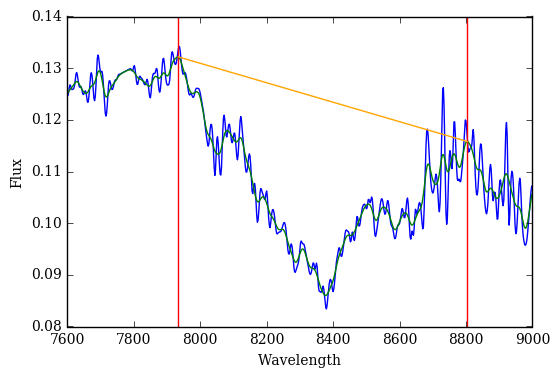

112 130.076463602 6.28679513181 1.3593611942 6.15873694853


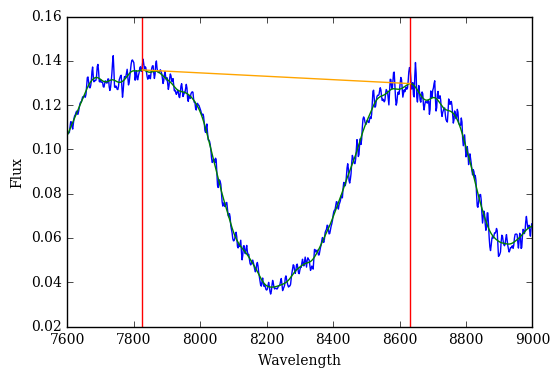

122 267.805122847 2.07276363269 0.893883977168 7.87220882795


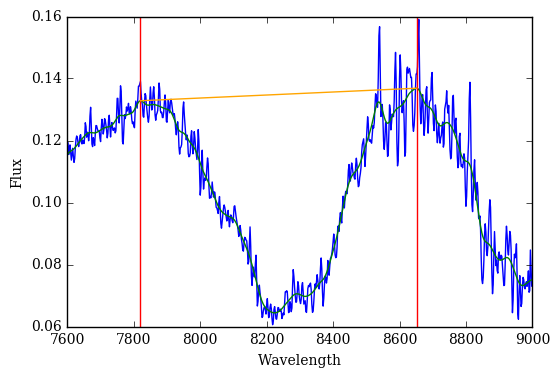

123 200.657211023 2.34358933588 2.13971953081 7.48605746509


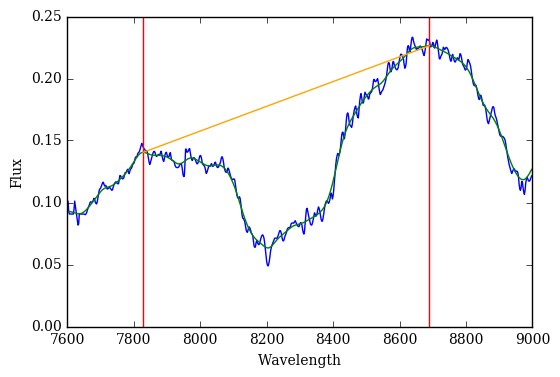

125 227.34617943 15.8841698907 1.37750516353 9.39466577783


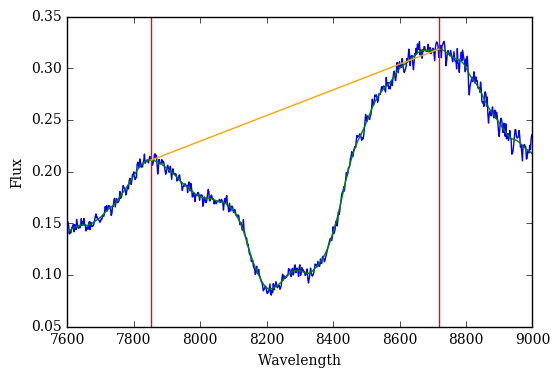

126 252.735168937 12.3654749742 1.56180265632 9.39466577783


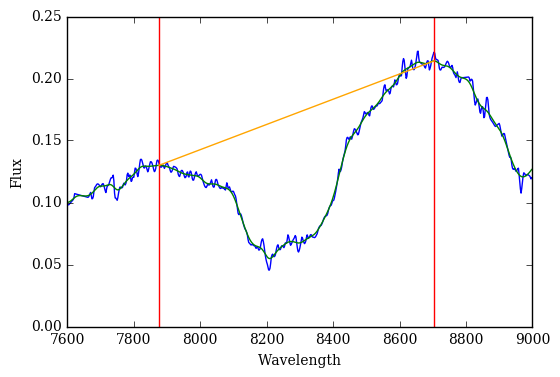

127 231.785153745 14.0002777447 2.03569054146 10.3926120045


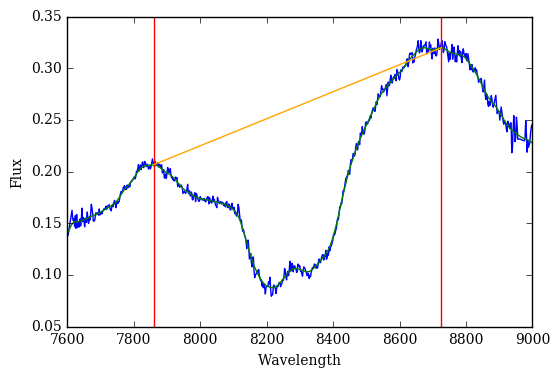

128 250.641799151 15.9462965603 3.25158640763 10.3926120045


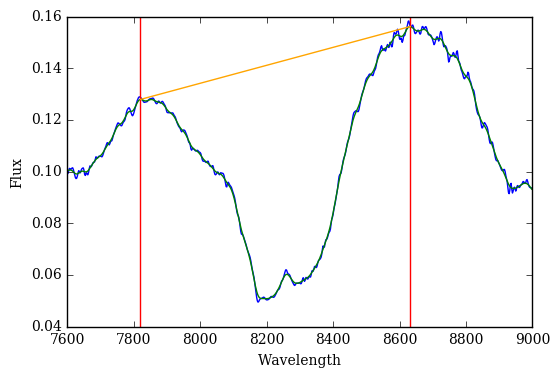

129 239.747784421 6.13066423748 1.04749389189 7.04507197513


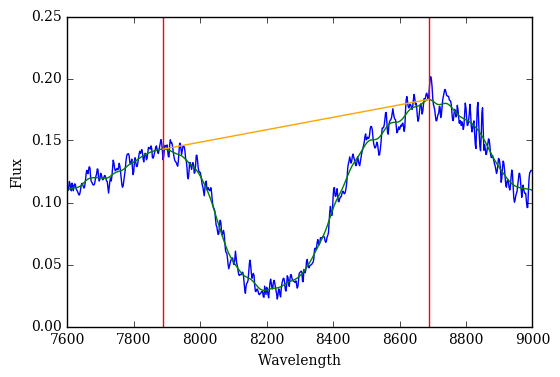

130 308.301420459 6.65700206535 1.35606558724 7.46091958237


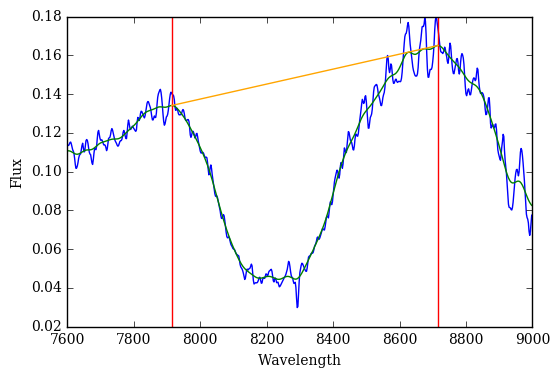

131 273.849272293 6.22958002024 1.26374710143 8.4516139898


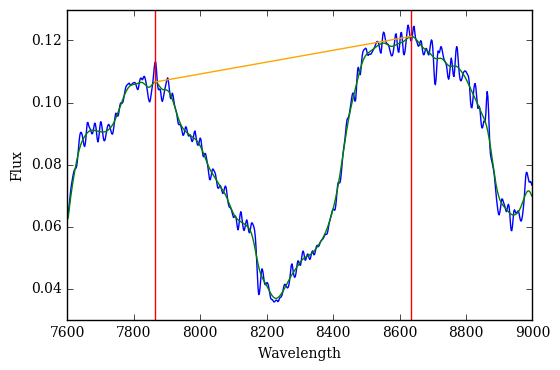

132 236.158777588 4.02286858775 1.48033145167 6.62916893948


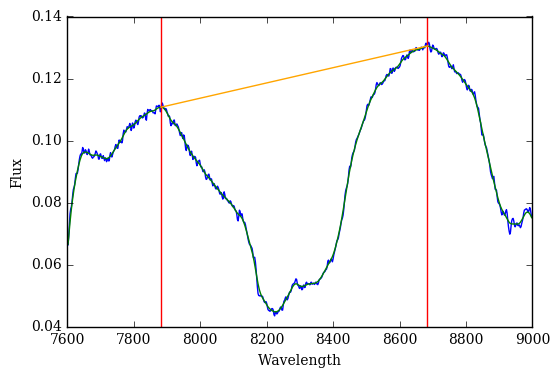

133 232.868750925 5.24192627771 0.40713085842 8.61632989256


In [21]:
EW_spec_list_late  = og_sn_arrays_match_m3[0] + og_sn_arrays_match_p3[0] + og_sn_arrays_match_p8[0]
EW_spec_list_early = og_sn_arrays_match_m3[1] + og_sn_arrays_match_p3[1] + og_sn_arrays_match_p8[1]

mean_EW_late, var_EW_late, EWs_late, err_late, phases_late, morphs_late, SNs_late = sa.measure_EWs(EW_spec_list_late, w1=7600., w2=8200., w3=9000., error=True)
mean_EW_early, var_EW_early, EWs_early, err_early, phases_early, morphs_early, SNs_early = sa.measure_EWs(EW_spec_list_early, w1=7600., w2=8200., w3=9000., error=True)

In [22]:
obj_list_late = []
for SN in SNs_late:
    obj_list_late.append(SN.name)
obj_set_late = set(obj_list_late)
print obj_set_late

obj_list_early = []
for SN in SNs_early:
    obj_list_early.append(SN.name)
obj_set_early = set(obj_list_early)
print obj_set_early

colors = ['turquoise', 'darkblue', 'green', 'limegreen']
color_dict_late = {}
for i, obj in enumerate(obj_set_late):
    color_dict_late[obj] = colors[i%4]
print color_dict_late

colors = ['darkred', 'pink', 'yellow', 'gold']
color_dict_early = {}
for i, obj in enumerate(obj_set_early):
    color_dict_early[obj] = colors[i%4]
print color_dict_early

set([u'2003cq', u'2007bc', u'2002hw', u'2007bd', u'2005am', u'2006bh', u'2001ep', u'2015f', u'2005bo', u'2004ef', u'2002ha', u'2006ac', u'2002er'])
set([u'2006bq', u'1994d', u'2002dj', u'2008hv', u'2004gs', u'2005w', u'2006hb', u'2005cf', u'2006ej', u'1996x', u'1998dx', u'2005ki', u'2003ch', u'2006ef', u'2005el', u'2002he'])
{u'2003cq': 'turquoise', u'2005bo': 'turquoise', u'2001ep': 'green', u'2002hw': 'green', u'2007bd': 'limegreen', u'2005am': 'turquoise', u'2007bc': 'darkblue', u'2015f': 'limegreen', u'2006bh': 'darkblue', u'2004ef': 'darkblue', u'2002ha': 'green', u'2006ac': 'limegreen', u'2002er': 'turquoise'}
{u'2006bq': 'darkred', u'1994d': 'pink', u'2002dj': 'yellow', u'2008hv': 'gold', u'2004gs': 'darkred', u'2005w': 'pink', u'2006hb': 'yellow', u'2005cf': 'gold', u'2006ej': 'darkred', u'1996x': 'pink', u'1998dx': 'yellow', u'2005ki': 'gold', u'2003ch': 'darkred', u'2002he': 'gold', u'2005el': 'yellow', u'2006ef': 'pink'}


In [23]:
# ['E', 'E0', 'E1', 'E2', 'E23', 'E3', 'E6', 'S0', 'S0a', 'Sa', 'Sab', 'Sb', 'Sbc', 'Sc', 'Scd', 'Sd', 'Sdm', 'Sm', 'Sp']
E_E6 = 'darkred'
S0_Sab = '#F000C5'
Sb_Scd = '#1CB700'
irr = '#00AED6'
color_map = {1: 'darkred',   2: 'darkred',    3: 'darkred',    4: 'darkred',    5: 'darkred',     6: 'darkred',
             7:'darkred',    8:'red',    9:'red',    10:'limegreen',   11:'limegreen',    12:'seagreen',   13:'seagreen',    
             14:'darkblue',   15:'darkblue',    16:'black',   17:'black',    18:'black'}
m_colors_late = []
m_colors_early = []
for m in morphs_late:
    m_colors_late.append(color_map[int(m)])
for m in morphs_early:
    m_colors_early.append(color_map[int(m)])
print morphs_late
print m_colors_late
print morphs_early
print m_colors_early

[10.0, 11.0, 14.0, 13.0, 12.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 13.0, 12.0, 12.0, 12.0, 10.0, 11.0, 10.0, 12.0, 11.0, 11.0, 10.0, 10.0, 12.0, 11.0, 12.0, 10.0, 10.0, 12.0, 10.0, 12.0, 10.0, 12.0, 10.0]
['limegreen', 'limegreen', 'darkblue', 'seagreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'seagreen', 'seagreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen', 'seagreen', 'limegreen']
[8.0, 8.0, 1.0, 8.0, 8.0, 8.0, 2.0, 6.0, 4.0, 1.0, 1.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 2.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 1.0, 8.0, 8.0, 8.0, 8.0, 8.0, 2.0, 6.0, 6.0, 8.0, 8.0]
['red', 'red', 'darkred', 'red', 'red', 'red', 'darkred', 'darkred', 'darkred', 'darkred', 'darkred', 'red', 'red', 'red', 'red', 'red', 'red', 'red', 're

In [24]:
phases_tot = np.concatenate((phases_late, phases_early))
EWs_tot = np.concatenate((EWs_late, EWs_early))
errs_tot = np.concatenate((err_late, err_early))
SNs_tot = EW_spec_list_late + EW_spec_list_early

avg_phase_late = np.average(phases_late)
avg_EW_late = np.average(EWs_late)
avg_phase_early = np.average(phases_early)
avg_EW_early = np.average(EWs_early)
print avg_phase_late, avg_EW_late
print avg_phase_early, avg_EW_early

avg_phase = np.average(phases_tot)
avg_EW = np.average(EWs_tot)

phases_late_new = phases_late - avg_phase_late
phases_early_new = phases_early - avg_phase_early
EWs_late_new = EWs_late - avg_EW_late
EWs_early_new = EWs_early - avg_EW_early

phases_tot_new = phases_tot - avg_phase
EWs_tot_new = EWs_tot - avg_EW
print avg_phase, avg_EW
# phases_late = phases_late + avg_phase
# phases_early = phases_early + avg_phase
# EWs_late = EWs_late + avg_EW
# EWs_early = EWs_early + avg_EW

2.65228808634 230.37074498
3.64343342309 192.244781871
3.20002629875 209.301133788


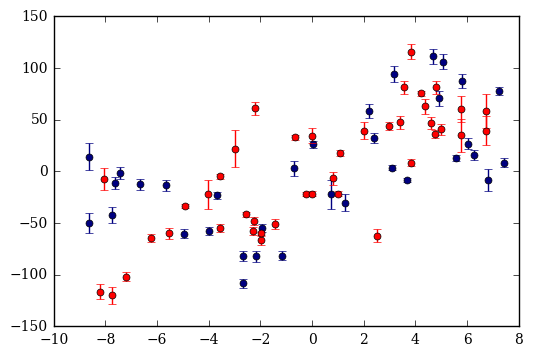

In [25]:
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

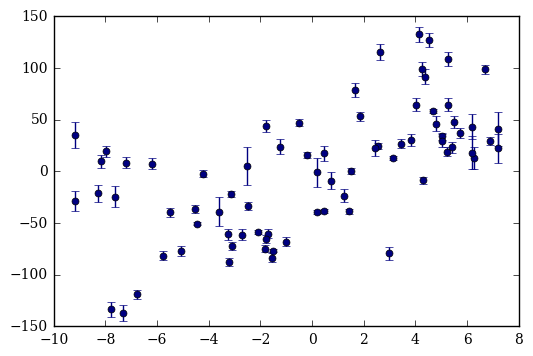

In [26]:
plt.errorbar(phases_tot_new, EWs_tot_new, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
plt.show()

In [27]:
from scipy.optimize import curve_fit
from scipy.special import erf

In [28]:
def lin(x, A, B):
    return A + B*x

def rms(y, yfit):
    return np.sqrt(np.sum((y-yfit)**2))

In [29]:
x = np.linspace(-10,14,1000)

In [30]:
popt2_late, pcov2_late = curve_fit(lin, phases_late, EWs_late, p0=None, sigma=err_late, absolute_sigma=True)
popt2_early, pcov2_early = curve_fit(lin, phases_early, EWs_early, p0=None, sigma=err_early, absolute_sigma=True)

popt2_tot, pcov2_tot = curve_fit(lin, phases_tot_new, EWs_tot_new, p0=None, sigma=errs_tot, absolute_sigma=True)

In [31]:
y_late = popt2_late[0] + popt2_late[1]*x
y_early = popt2_early[0] + popt2_early[1]*x
y_tot = popt2_tot[0] + popt2_tot[1]*x

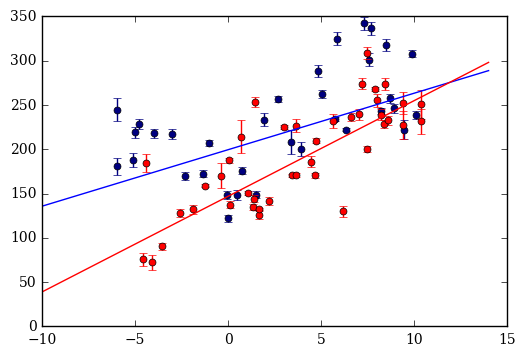

In [32]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
# plt.plot(x,y,'g')
plt.plot(x,y_late,'b')
plt.plot(x,y_early,'r')
# plt.plot(x,y_tot,'g')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

-15.952199922 9.37202909754


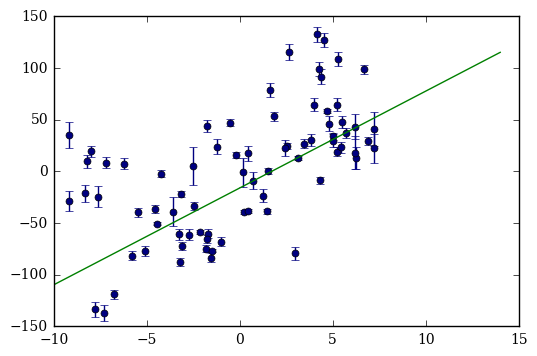

In [33]:
print popt2_tot[0], popt2_tot[1]
plt.errorbar(phases_tot_new, EWs_tot_new, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
plt.plot(x,y_tot,'g')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [34]:
ints_tot = []
slopes_tot = []
for i in range(1000):
    strap_list = np.random.random_sample(len(EWs_tot_new))
    strap_list *= len(EWs_tot_new)
    strap_list = strap_list.astype(int)
    new_phases_tot = []
    new_EWs_tot = []
    new_errs_tot = []
    for i in strap_list:
        new_phases_tot.append(phases_tot_new[i])
        new_EWs_tot.append(EWs_tot_new[i])
        new_errs_tot.append(errs_tot[i])
    
    popt2_tot, pcov2_tot = curve_fit(lin, new_phases_tot, new_EWs_tot, p0=None, sigma=new_errs_tot, absolute_sigma=True)
    ints_tot.append(popt2_tot[0])
    slopes_tot.append(popt2_tot[1])
    
#     plt.errorbar(new_phases_tot, new_EWs_tot, yerr=errs_tot,  fmt='o', markersize=5, color = "#000080")
#     plt.plot(x,y_tot,'g')

In [35]:
res_arrs = []
for i in range(len(slopes_tot)):
    ew = ints_tot[i] + slopes_tot[i]*x
    res_arr = np.absolute(ew - y_tot)
    res_arrs.append(res_arr)
res_arrs_t = np.transpose(res_arrs)

In [36]:
sigs = []
for ps in res_arrs_t:
    sig = np.average(np.percentile(ps, [32, 68]))
    sigs.append(sig)

4.03039136652
4.05742553105


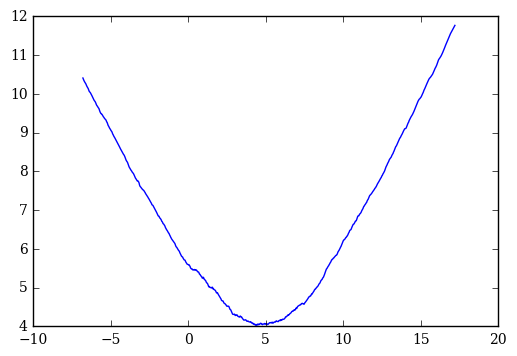

In [37]:
from scipy.interpolate import interp1d
interp_sig = interp1d(x+avg_phase, sigs, bounds_error=False, fill_value=None)
sigma = interp_sig(5)
print np.amin(sigs)
print sigma
plt.plot(x+avg_phase,sigs)
plt.show()

In [38]:
int_tot= np.percentile(ints_tot, [32, 50, 68])
print int_tot

int_sig_tot = .5*((int_tot[1] - int_tot[0]) + (int_tot[2] - int_tot[1]))
print int_sig_tot

[-18.90294966 -16.26239199 -13.07666411]
2.91314277842


In [39]:
slope_tot= np.percentile(slopes_tot, [32, 50, 68])
print slope_tot

slope_sig_tot = .5*((slope_tot[1] - slope_tot[0]) + (slope_tot[2] - slope_tot[1]))
print slope_sig_tot

[ 8.80371389  9.37010363  9.90793644]
0.552111271425


In [40]:
popt2_tot_og, pcov2_tot_og = curve_fit(lin, phases_tot, EWs_tot, p0=None, sigma=errs_tot, absolute_sigma=True)
print popt2_tot_og[0], popt2_tot_og[1]

163.358194494 9.37202908171


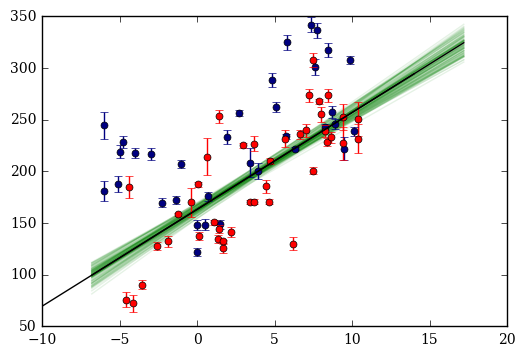

In [41]:
plt.errorbar(phases_late, EWs_late, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early, EWs_early, yerr=err_early,  fmt='o', markersize=5, color = "red")
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="g", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k')
plt.plot(x,popt2_tot_og[0] + popt2_tot_og[1]*x,'k')
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [42]:
ints_late = []
ints_early = []
slopes_late = []
slopes_early = []
for i in range(1000):
#     delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_late))
#     delta_EW = np.random.normal(loc=0, scale=err_late, size=len(EWs_late))
#     new_phases_late = phases_late + delta_phase
#     new_EWs_late = EWs_late + delta_EW
    
#     delta_phase = np.random.normal(loc=0, scale=.5, size=len(phases_early))
#     delta_EW = np.random.normal(loc=0, scale=err_early, size=len(EWs_early))
#     new_phases_early = phases_early + delta_phase
#     new_EWs_early = EWs_early + delta_EW
    strap_list = np.random.random_sample(len(EWs_late_new))
    strap_list *= len(EWs_late_new)
    strap_list = strap_list.astype(int)
    new_phases_late = []
    new_EWs_late = []
    new_errs_late = []
    for i in strap_list:
        new_phases_late.append(phases_late_new[i])
        new_EWs_late.append(EWs_late_new[i])
        new_errs_late.append(err_late[i])
        
    strap_list = np.random.random_sample(len(EWs_early_new))
    strap_list *= len(EWs_early_new)
    strap_list = strap_list.astype(int)
    new_phases_early = []
    new_EWs_early = []
    new_errs_early = []
    for i in strap_list:
        new_phases_early.append(phases_early_new[i])
        new_EWs_early.append(EWs_early_new[i])
        new_errs_early.append(err_early[i])
    
    popt2_late, pcov2_late = curve_fit(lin, new_phases_late, new_EWs_late, p0=None, sigma=new_errs_late, absolute_sigma=True)
    popt2_early, pcov2_early = curve_fit(lin, new_phases_early, new_EWs_early, p0=None, sigma=new_errs_early, absolute_sigma=True)
    ints_late.append(popt2_late[0])
    ints_early.append(popt2_early[0])
    slopes_late.append(popt2_late[1])
    slopes_early.append(popt2_early[1])

In [43]:
int_late= np.percentile(ints_late, [32, 50, 68])
int_early= np.percentile(ints_early, [32, 50, 68])
print int_late
print int_early

int_sig_late = .5*((int_late[1] - int_late[0]) + (int_late[2] - int_late[1]))
int_sig_early = .5*((int_early[1] - int_early[0]) + (int_early[2] - int_early[1]))
print int_sig_late
print int_sig_early
# print sort_ints_late_low, sort_ints_late_up, sort_ints_early_low, sort_ints_early_up

[-17.4043152  -13.59207757 -10.05188554]
[-9.47154403 -6.2110426  -2.99044806]
3.67621483149
3.24054798496


In [44]:
slope_late= np.percentile(slopes_late, [32, 50, 68])
slope_early= np.percentile(slopes_early, [32, 50, 68])
print slope_late
print slope_early

slope_sig_late = .5*((slope_late[1] - slope_late[0]) + (slope_late[2] - slope_late[1]))
slope_sig_early = .5*((slope_early[1] - slope_early[0]) + (slope_early[2] - slope_early[1]))
print slope_sig_late
print slope_sig_early

[ 5.8877613   6.57225154  7.20872992]
[  9.839171    10.71335498  11.6908119 ]
0.66048430891
0.92582045014


2003cq 1 seagreen 1.2
2007bc 1 limegreen 1.37
2002hw 1 darkblue 1.44
2007bd 1 limegreen 1.3
2005am 3 limegreen 1.3
2006bh 1 seagreen 1.39129906856
2001ep 5 seagreen 1.3
2015f 1 seagreen 1.26
2005bo 2 limegreen 1.28
2004ef 3 seagreen 1.39
2002ha 3 limegreen 1.22
2006ac 1 seagreen 1.2
2002er 11 limegreen 1.23
2006bq 1 7.20517073505 red 1.29
1994d 10 -4.57658139549 red 1.37
2002dj 3 -4.42741330681 darkred 1.19
2008hv 3 1.649302898 red 1.13369017264
2004gs 1 1.41616176363 red 1.41
2005w 1 0.663105336289 red 1.22957865079
2006hb 1 7.87220882795 darkred 1.44
2005cf 6 3.64842750986 red 1.1
2006ej 2 -0.386103412998 red 1.26659174257
1996x 4 -1.89285412808 darkred 1.26
1998dx 1 4.7115224089 darkred 1.32
2005ki 1 7.99346943261 red 1.41
2003ch 1 6.15873694853 red 1.22
2006ef 1 4.43362917059 red 1.20119166548
2005el 3 1.35775586012 red 1.27
2002he 3 -1.26102420152 darkred 1.44


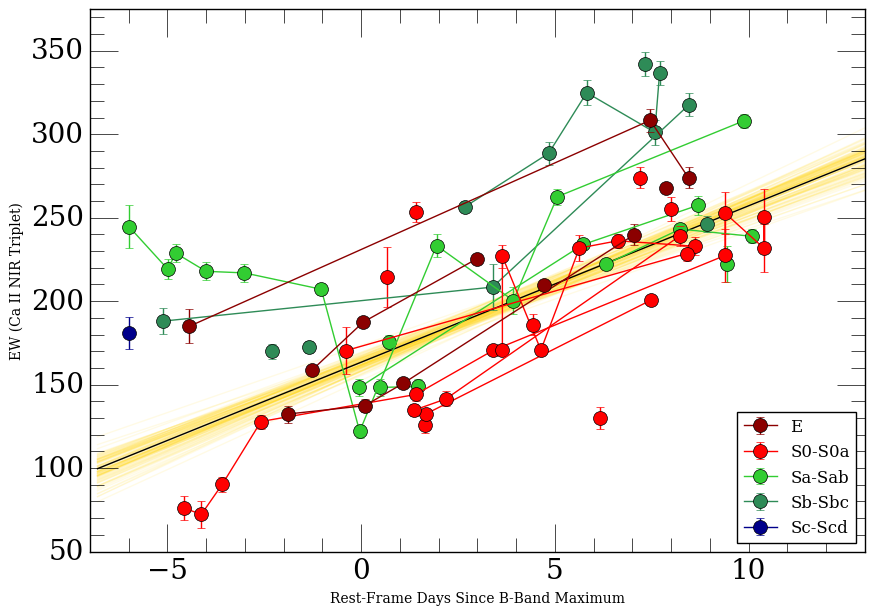

In [53]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
# for i in range(100):
#     m_l = np.random.normal(loc=slope_late[1], scale=slope_sig_late)
#     b_l = np.random.normal(loc=int_late[1], scale=int_sig_late)
#     m_e = np.random.normal(loc=slope_early[1], scale=slope_sig_early)
#     b_e = np.random.normal(loc=int_early[1], scale=int_sig_early)
    
#     plt.plot(x+avg_phase_late, m_l*x+b_l+avg_EW_late, color="#000080", alpha=0.1, zorder=-1)
#     plt.plot(x+avg_phase_early, m_e*x+b_e+avg_EW_early, color="#cc0000", alpha=0.1, zorder=-1)
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="gold", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k')

E = []
S0_S0a = []

Sa_Sab = []
Sb_Sbc = []
Sc_Scd = []

for obj in obj_set_late:
    data = []
    for i,SN in enumerate(SNs_late):
        if SN.name == obj:
            data.append([phases_late[i], EWs_late[i], err_late[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 10<= morph <=11:
        Sa_Sab.append([resids,resid_errs])
        if len(Sa_Sab) == 1:
            lb = 'Sa-Sab'
        else:
            lb = ''
    elif 12<= morph <=13:
        Sb_Sbc.append([resids,resid_errs])
        if len(Sb_Sbc) == 1:
            lb = 'Sb-Sbc'
        else:
            lb = ''
    elif 14<= morph <=15:
        Sc_Scd.append([resids,resid_errs])
        if len(Sc_Scd) == 1:
            lb = 'Sc-Scd'
        else:
            lb = ''
        
        
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_late[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_map[morph], label=lb)

for obj in obj_set_early:
    data = []
    for i,SN in enumerate(SNs_early):
        if SN.name == obj:
            data.append([phases_early[i], EWs_early[i], err_early[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), phase[0], color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 1<= morph <=7:
        E.append([resids,resid_errs])
        if len(E) == 1:
            lb = 'E'
        else:
            lb = ''
    elif 8<= morph <=9:
        S0_S0a.append([resids,resid_errs])
        if len(S0_S0a) == 1:
            lb = 'S0-S0a'
        else:
            lb = ''
    
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_early[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_map[morph], label=lb)
    
# for i in range(len(phases_late_new)):
# #     plt.errorbar(phases_late_new[i]+avg_phase_late, EWs_late_new[i]+avg_EW_late, yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early_new[i]+avg_phase_late, EWs_early_new[i]+avg_EW_early, yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
# #     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
#     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = color_dict_late[SNs_late[i].name])
#     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = color_dict_early[SNs_early[i].name])

# plt.plot(x,y,'g')
# plt.plot(x,y,'g')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + sort_slopes_late_low*x, sort_ints_late_up + sort_slopes_late_up*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + sort_slopes_early_low*x, sort_ints_early_up + sort_slopes_early_up*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [4,3,1,0,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=4, numpoints=1)
plt.xlim(-7,13)
plt.ylim(50,375)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [46]:
E_avgs = []
E_errs = []
for i, e in enumerate(E):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    E_avgs.append(avg)
    E_errs.append(err)
    print avg, err
print 

S0_S0a_avgs = []
S0_S0a_errs = []
for i, e in enumerate(S0_S0a):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    S0_S0a_avgs.append(avg)
    S0_S0a_errs.append(err)
    print avg, err
print 

Sa_Sab_avgs = []
Sa_Sab_errs = []
for i, e in enumerate(Sa_Sab):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sa_Sab_avgs.append(avg)
    Sa_Sab_errs.append(err)
    print avg, err
print 

Sb_Sbc_avgs = []
Sb_Sbc_errs = []
for i, e in enumerate(Sb_Sbc):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sb_Sbc_avgs.append(avg)
    Sb_Sbc_errs.append(err)
    print avg, err
print 

Sc_Scd_avgs = []
Sc_Scd_errs = []
for i, e in enumerate(Sc_Scd):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    Sc_Scd_avgs.append(avg)
    Sc_Scd_errs.append(err)
    print avg, err

56.4574535095 5.88635195331
30.6683582807 5.29530101039
-13.1662638973 3.62367186885
2.32456982527 5.07530953147
21.5634525395 3.43599173658

42.9193556983 7.74042189572
-26.6892823104 3.88018534934
-44.1942817793 3.37416321883
76.6213896917 7.7685377353
44.8266752145 18.9274000566
-3.11544812232 2.81225286994
-1.47945512268 8.29699826029
16.9752468779 8.74558389704
-91.0015926796 7.67532131229
-19.1345486985 7.48333627774
-28.4601558183 3.93994265493

5.62088306551 6.80743474056
-29.7596197224 12.2228063848
-5.65913719824 3.52373453377
-23.9632158275 5.07134128034
4.926541276 3.90980956776
62.8728887973 2.91176550772

21.9066037998 7.46255260544
-0.824997073839 7.35073884905
84.4790033296 3.54852640976
28.0946554036 8.38455433673
53.5737581911 6.92346865907
110.047642899 8.61507836022

73.5987829385 13.7943125609


In [47]:
print 'E:', np.average(E_avgs), np.sqrt(np.sum(np.asarray(E_errs)**2.))/len(E_avgs)
print 'S0_S0a:', np.average(S0_S0a_avgs), np.sqrt(np.sum(np.asarray(S0_S0a_errs)**2.))/len(S0_S0a_avgs)
print 'Sa_Sab:', np.average(Sa_Sab_avgs), np.sqrt(np.sum(np.asarray(Sa_Sab_errs)**2.))/len(Sa_Sab_avgs)
print 'Sb_Sbc:', np.average(Sb_Sbc_avgs), np.sqrt(np.sum(np.asarray(Sb_Sbc_errs)**2.))/len(Sb_Sbc_avgs)
print 'Sc_Scd:', np.average(Sc_Scd_avgs), np.sqrt(np.sum(np.asarray(Sc_Scd_errs)**2.))/len(Sc_Scd_avgs)

E: 19.5695140516 2.12964932302
S0_S0a: -2.97564518625 2.55294322059
Sa_Sab: 2.33972339843 2.67518618429
Sb_Sbc: 49.5461110916 2.95695901198
Sc_Scd: 73.5987829385 13.7943125609


2003cq 1 seagreen 1.2
2007bc 1 limegreen 1.37
2002hw 1 darkblue 1.44
2007bd 1 limegreen 1.3
2005am 3 limegreen 1.3
2006bh 1 seagreen 1.39129906856
2001ep 5 seagreen 1.3
2015f 1 seagreen 1.26
2005bo 2 limegreen 1.28
2004ef 3 seagreen 1.39
2002ha 3 limegreen 1.22
2006ac 1 seagreen 1.2
2002er 11 limegreen 1.23
2006bq 1 red 1.29
1994d 10 red 1.37
2002dj 3 darkred 1.19
2008hv 3 red 1.13369017264
2004gs 1 red 1.41
2005w 1 red 1.22957865079
2006hb 1 darkred 1.44
2005cf 6 red 1.1
2006ej 2 red 1.26659174257
1996x 4 darkred 1.26
1998dx 1 darkred 1.32
2005ki 1 red 1.41
2003ch 1 red 1.22
2006ef 1 red 1.20119166548
2005el 3 red 1.27
2002he 3 darkred 1.44


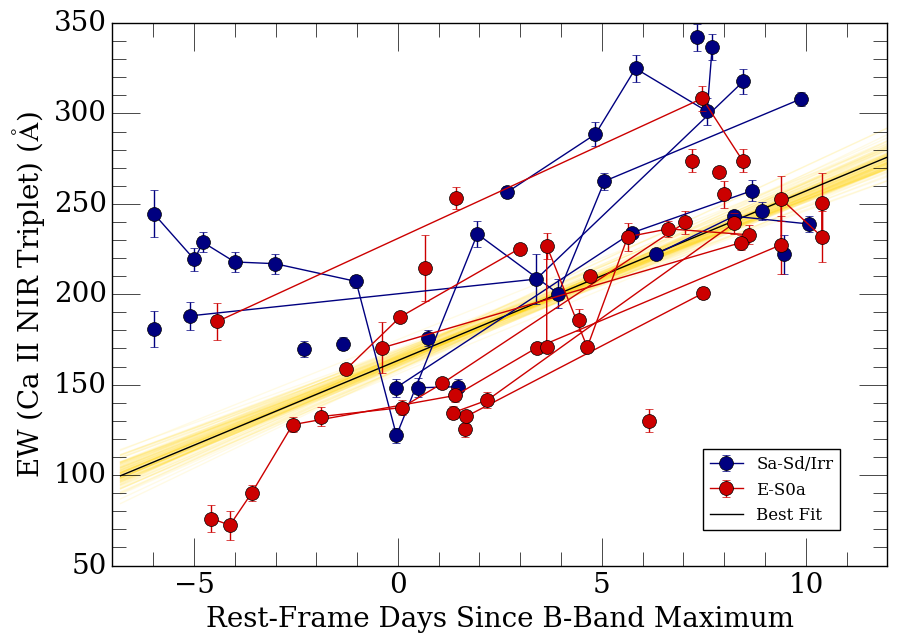

In [48]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Rest-Frame Days Since B-Band Maximum", fontsize=20)
plt.ylabel("EW (Ca II NIR Triplet) ($\mathrm{\AA}$)", fontsize=20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
# for i in range(100):
#     m_l = np.random.normal(loc=slope_late[1], scale=slope_sig_late)
#     b_l = np.random.normal(loc=int_late[1], scale=int_sig_late)
#     m_e = np.random.normal(loc=slope_early[1], scale=slope_sig_early)
#     b_e = np.random.normal(loc=int_early[1], scale=int_sig_early)
    
#     plt.plot(x+avg_phase_late, m_l*x+b_l+avg_EW_late, color="#000080", alpha=0.1, zorder=-1)
#     plt.plot(x+avg_phase_early, m_e*x+b_e+avg_EW_early, color="#cc0000", alpha=0.1, zorder=-1)
for i in range(100):
    m_l = np.random.normal(loc=slope_tot[1], scale=slope_sig_tot)
    b_l = np.random.normal(loc=int_tot[1], scale=int_sig_tot)
    
    plt.plot(x+avg_phase, m_l*x+b_l+avg_EW, color="gold", alpha=0.1, zorder=-1)
plt.plot(x+avg_phase,y_tot+avg_EW,'k', label='Best Fit')

late_resids = []
early_resids = []

for obj in obj_set_late:
    data = []
    for i,SN in enumerate(SNs_late):
        if SN.name == obj:
            data.append([phases_late[i], EWs_late[i], err_late[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 10<= morph <=18:
        late_resids.append([resids,resid_errs])
        if len(late_resids) == 1:
            lb = 'Sa-Sd/Irr'
        else:
            lb = ''
        
        
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_late[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = '#000080', label=lb)

for obj in obj_set_early:
    data = []
    for i,SN in enumerate(SNs_early):
        if SN.name == obj:
            data.append([phases_early[i], EWs_early[i], err_early[i]])
            morph = SN.ned_host
            dm15 = SN.dm15
    t_data = np.transpose(data)
    sort_inds = np.argsort(t_data[0])
    phase = t_data[0][sort_inds]
    ew = t_data[1][sort_inds]
    err = t_data[2][sort_inds]
    print obj, len(phase), color_map[morph], dm15
    
    ew_fit = popt2_tot_og[0] + popt2_tot_og[1]*phase
    resids = ew - ew_fit
    fit_errs = interp_sig(phase)
    resid_errs = np.sqrt(err**2. + fit_errs**2.)
#     print fit_errs
    
    if 1<= morph <=9:
        early_resids.append([resids,resid_errs])
        if len(early_resids) == 1:
            lb = 'E-S0a'
        else:
            lb = ''
    
#     plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = color_dict_early[obj])
    plt.errorbar(phase, ew, yerr=err,  fmt='o-', markersize=10, color = '#cc0000', label=lb)
    
# for i in range(len(phases_late_new)):
# #     plt.errorbar(phases_late_new[i]+avg_phase_late, EWs_late_new[i]+avg_EW_late, yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early_new[i]+avg_phase_late, EWs_early_new[i]+avg_EW_early, yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
# #     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = "#000080", markeredgecolor=m_colors_late[i], markeredgewidth=2)
# #     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = "#cc0000", markeredgecolor=m_colors_early[i], markeredgewidth=2)
#     plt.errorbar(phases_late[i], EWs_late[i], yerr=err_late[i],  fmt='o', markersize=10, color = color_dict_late[SNs_late[i].name])
#     plt.errorbar(phases_early[i], EWs_early[i], yerr=err_early[i],  fmt='o', markersize=10, color = color_dict_early[SNs_early[i].name])

# plt.plot(x,y,'g')
# plt.plot(x,y,'g')
# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + sort_slopes_late_low*x, sort_ints_late_up + sort_slopes_late_up*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + sort_slopes_early_low*x, sort_ints_early_up + sort_slopes_early_up*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')

handles, labels = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc=4, numpoints=1, bbox_to_anchor=(0.5, 0.05, 0.45, 0.5))
plt.xlim(-7,12)
plt.ylim(50,350)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host_2bins.pdf', dpi = 300, bbox_inches = 'tight')
plt.savefig('../../../Paper_Drafts/plot_images/Ca_NIR_host_2bins.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [49]:
early_avgs = []
early_errs = []
for i, e in enumerate(early_resids):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    early_avgs.append(avg)
    early_errs.append(err)
    print avg, err
print 

late_avgs = []
late_errs = []
for i, e in enumerate(late_resids):
    avg = np.average(e[0])
    err = np.sqrt(np.sum(e[1]**2.))/len(e[0])
    late_avgs.append(avg)
    late_errs.append(err)
    print avg, err
print 

42.9193556983 7.74042189572
-26.6892823104 3.88018534934
56.4574535095 5.88635195331
-44.1942817793 3.37416321883
76.6213896917 7.7685377353
44.8266752145 18.9274000566
30.6683582807 5.29530101039
-3.11544812232 2.81225286994
-1.47945512268 8.29699826029
-13.1662638973 3.62367186885
2.32456982527 5.07530953147
16.9752468779 8.74558389704
-91.0015926796 7.67532131229
-19.1345486985 7.48333627774
-28.4601558183 3.93994265493
21.5634525395 3.43599173658

21.9066037998 7.46255260544
5.62088306551 6.80743474056
73.5987829385 13.7943125609
-29.7596197224 12.2228063848
-5.65913719824 3.52373453377
-0.824997073839 7.35073884905
84.4790033296 3.54852640976
28.0946554036 8.38455433673
-23.9632158275 5.07134128034
53.5737581911 6.92346865907
4.926541276 3.90980956776
110.047642899 8.61507836022
62.8728887973 2.91176550772



In [50]:
print 'E-S0a:', np.average(late_avgs), np.std(late_avgs), np.sqrt(np.sum(np.asarray(late_errs)**2.))/len(late_avgs)
print 'Sa-Scd:', np.average(early_avgs), np.std(early_avgs), np.sqrt(np.sum(np.asarray(early_errs)**2.))/len(early_avgs)
print (np.average(late_avgs) - np.average(early_avgs))/np.sqrt((np.std(late_avgs)**2) + np.std(early_avgs)**2)

E-S0a: 29.6087530676 41.9779687065 2.12437426487
Sa-Scd: 4.06971707556 40.8135807803 1.87708734394
0.436204900282


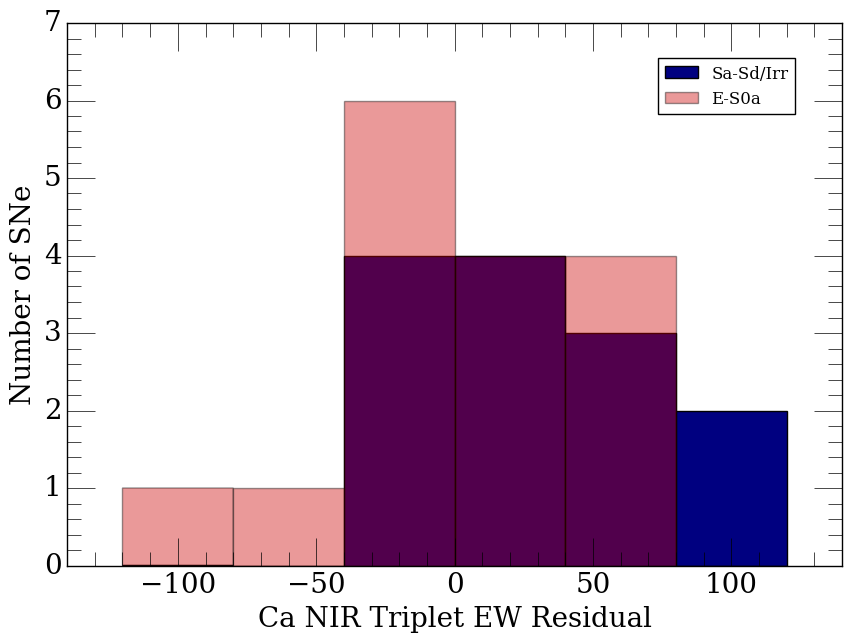

In [51]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel("Ca NIR Triplet EW Residual", fontsize = 20)
plt.ylabel("Number of SNe", fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.hist(late_avgs, color = '#000080', bins=range(-120, 140, 40), label='Sa-Sd/Irr')
plt.hist(early_avgs, color = '#cc0000', alpha=.4, bins=range(-120, 140, 40), label='E-S0a')
plt.legend(loc=1, bbox_to_anchor=(0.5, 0.45, 0.45, 0.5))
plt.ylim(0,7)
plt.xlim(-140,140)
plt.savefig('../../../Paper_Drafts/host_composites_updated/Ca_NIR_host_hist.pdf', dpi = 300, bbox_inches = 'tight')
plt.savefig('../../../Paper_Drafts/plot_images/Ca_NIR_host_hist.png', dpi = 300, bbox_inches = 'tight')
plt.show()

In [55]:
from scipy import stats
stats.ks_2samp(early_avgs, late_avgs)

Ks_2sampResult(statistic=0.26923076923076922, pvalue=0.60298300054228293)

In [58]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
#     inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    inv_sigma2 = 1.0/(yerr**2)
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

# def lnlike_const_slope(theta, x, y, yerr, m):
#     b, lnf = theta
#     model = m*x + b
#     inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
# #     inv_sigma2 = 1.0/(yerr**2)
#     return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))

import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
nll_c = lambda *args: -lnlike_const_slope(*args)
result_late = op.minimize(nll, [10,0, .5], args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late)))
m_ml_late, b_ml_late, lnf_ml_late = result_late["x"]
print m_ml_late, b_ml_late, np.exp(lnf_ml_late)

result_early = op.minimize(nll, [10, 0, .5], args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early)))
m_ml_early, b_ml_early, lnf_ml_early = result_early["x"]
print m_ml_early, b_ml_early, np.exp(lnf_ml_early)

# print

#const slope
# m_c = 7
# result_late_c = op.minimize(nll_c, [0, .5], args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late), m_c))
# b_ml_late_c, lnf_ml_late_c = result_late_c["x"]
# print b_ml_late_c, np.exp(lnf_ml_late_c)

# result_early_c = op.minimize(nll_c, [0, .5], args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early), m_c))
# b_ml_early_c, lnf_ml_early_c = result_early_c["x"]
# print b_ml_early_c, np.exp(lnf_ml_early_c)

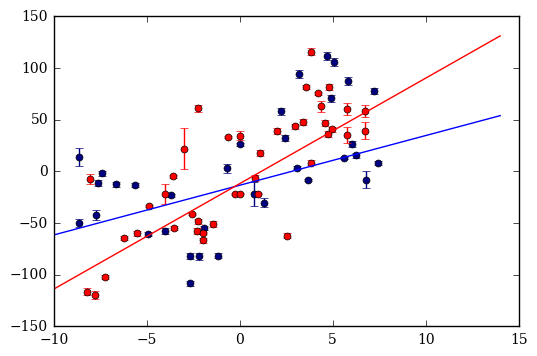

In [60]:
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=5, color = "#000080")
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=5, color = "red")
plt.plot(x,m_ml_late*x + b_ml_late,'b')
plt.plot(x,m_ml_early*x + b_ml_early,'r')

# plt.plot(x,m_c*x + b_ml_late_c,'b')
# plt.plot(x,m_c*x + b_ml_early_c,'r')

# plt.plot(x,y_late,'b')
# plt.plot(x,y_early,'r')
# plt.fill_between(x, sort_ints_late_low + slope*x, sort_ints_late_up + slope*x, color='b', alpha=.6)
# plt.fill_between(x, sort_ints_early_low + slope*x, sort_ints_early_up + slope*x, color='r', alpha=.6)
# plt.plot(phases_late, EWs_late, 'bo')
# plt.plot(phases_early, EWs_early, 'ro')
# plt.ylim(50,400)
plt.show()

In [61]:
import emcee
def lnprior(theta):
    m, b, lnf = theta
#     if 0.0 < m < 20. and 0 < b < 300.0 and -10.0 < lnf < 1.0:
#         return 0.0
    if 0.0 < m < 20. and -100.0 < b < 100.0 and -10.0 < lnf < 2.0:
        return 0.0
    return -np.inf

def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

# def lnprior_c(theta):
#     b, lnf = theta
#     #7.01263387516
#     if 0 < b < 300.0 and -10.0 < lnf < 1.0:
#         return 0.0
# #     if 7.01 < m < 7.02 and 0.0 < b < 300.0 and -10.0 < lnf < 1.0:
# #         return 0.0
#     return -np.inf

# def lnprob_c(theta, x, y, yerr, m):
#     lp = lnprior_c(theta)
#     if not np.isfinite(lp):
#         return -np.inf
#     return lp + lnlike_const_slope(theta, x, y, yerr, m)

In [62]:
ndim, nwalkers = 3, 100
pos_late = [result_late["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]
pos_early = [result_early["x"] + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

# ndim_c, nwalkers = 2, 100
# pos_late_c = [result_late_c["x"] + 1e-4*np.random.randn(ndim_c) for i in range(nwalkers)]
# pos_early_c = [result_early_c["x"] + 1e-4*np.random.randn(ndim_c) for i in range(nwalkers)]

In [63]:
sampler_late = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_late_new), np.asarray(EWs_late_new), np.asarray(err_late)))
sampler_early = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=(np.asarray(phases_early_new), np.asarray(EWs_early_new), np.asarray(err_early)))

sampler_late.run_mcmc(pos_late, 500)
sampler_early.run_mcmc(pos_early, 500)


# sampler_late_c = emcee.EnsembleSampler(nwalkers, ndim_c, lnprob_c, args=(np.asarray(phases_late_new), np.asarray(EWs_late), np.asarray(err_late), m_c))
# sampler_early_c = emcee.EnsembleSampler(nwalkers, ndim_c, lnprob_c, args=(np.asarray(phases_early_new), np.asarray(EWs_early), np.asarray(err_early), m_c))

# sampler_late_c.run_mcmc(pos_late_c, 500)
# sampler_early_c.run_mcmc(pos_early_c, 500)

(array([[ 10.21328409, -12.20398589,  -7.5701274 ],
        [  9.98561728, -12.00948012,  -0.16739171],
        [ 10.24096471, -11.51393756,  -1.59692186],
        [ 10.43102931, -11.29914243,  -6.67860054],
        [ 10.23250564, -12.26920382,  -6.98320792],
        [ 10.18905029, -11.88280434,  -2.73790305],
        [ 10.28198025, -11.5174343 ,  -1.06786859],
        [ 10.13254693, -11.81867828,  -4.11588154],
        [ 10.16766369, -11.58272265,  -7.11088671],
        [ 10.28107161, -11.57744179,  -3.65231968],
        [ 10.15818893, -11.98493396,  -7.03934764],
        [ 10.19183262, -11.89827215,   0.79393509],
        [ 10.23952432, -11.50348415,  -5.11217234],
        [ 10.38770886, -11.91990512,   0.77507872],
        [ 10.24300872, -11.94328704,  -0.26961857],
        [ 10.22455092, -11.53615479,  -0.72345564],
        [ 10.15957681, -11.68203136,  -6.08685098],
        [ 10.26610234, -11.95288317,  -2.70980737],
        [ 10.3038515 , -11.64486459,   1.18717363],
        [ 10

In [195]:
samples_late = sampler_late.chain[:, 50:, :].reshape((-1, ndim))
samples_early = sampler_early.chain[:, 50:, :].reshape((-1, ndim))

samples_late[:, 2] = np.exp(samples_late[:, 2])
m_mcmc_late, b_mcmc_late, f_mcmc_late = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_late, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_late, b_mcmc_late, f_mcmc_late

samples_early[:, 2] = np.exp(samples_early[:, 2])
m_mcmc_early, b_mcmc_early, f_mcmc_early = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
                                                         zip(*np.percentile(samples_early, [32, 50, 68],
                                                            axis=0)))
print m_mcmc_early, b_mcmc_early, f_mcmc_early

# print
# #constant slope
# samples_late_c = sampler_late_c.chain[:, 50:, :].reshape((-1, ndim_c))
# samples_early_c = sampler_early_c.chain[:, 50:, :].reshape((-1, ndim_c))

# samples_late_c[:, 1] = np.exp(samples_late_c[:, 1])
# b_mcmc_late_c, f_mcmc_late_c = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                                             zip(*np.percentile(samples_late_c, [32, 50, 68],
#                                             axis=0)))
# print b_mcmc_late_c, f_mcmc_late_c

# samples_early_c[:, 1] = np.exp(samples_early_c[:, 1])
# b_mcmc_early_c, f_mcmc_early_c = map(lambda v: (v[1], v[2]-v[1], v[1]-v[0]),
#                                                          zip(*np.percentile(samples_early_c, [32, 50, 68],
#                                                             axis=0)))
# print b_mcmc_early_c, f_mcmc_early_c

(8.0170011460049171, 0.33680698054835467, 0.34604674490826692) (-9.6730243027198117, 1.4371665922362755, 1.4169836130758338) (0.026422663857862051, 0.19743985076135298, 0.023787141301235638)
(11.083739028422519, 0.28314289912121815, 0.28816487639262434) (-52.337117754447547, 1.3125554888637794, 1.2769214413620347) (0.013628810415147293, 0.10875989462916313, 0.011813847345701114)


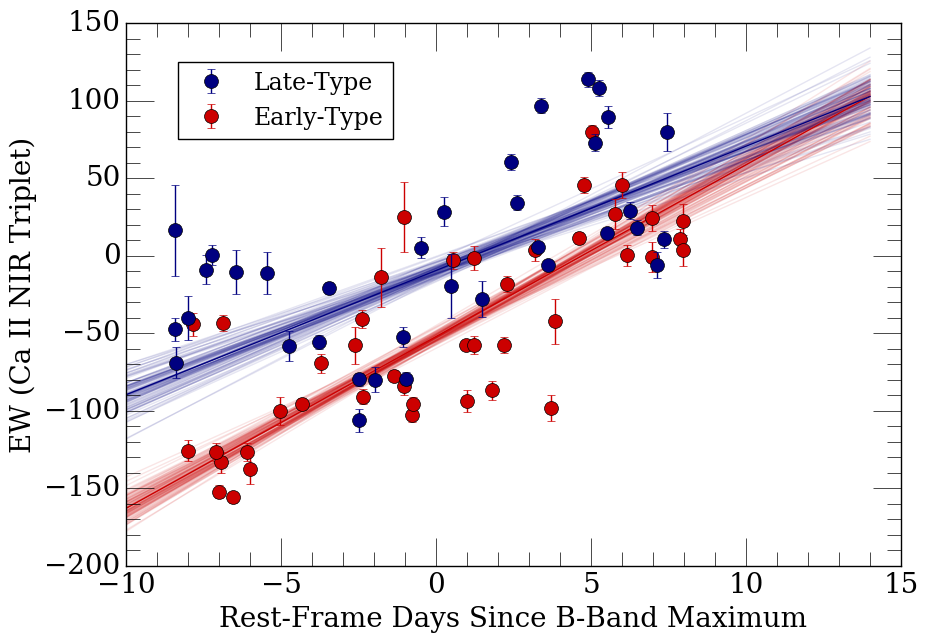

In [196]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\Delta m_{15}$ (B) (mag)', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
for m, b, lnf in samples_late[np.random.randint(len(samples_late), size=100)]:
    plt.plot(x, m*x+b, color="#000080", alpha=0.1, zorder=-1)
for m, b, lnf in samples_early[np.random.randint(len(samples_early), size=100)]:
    plt.plot(x, m*x+b, color="#cc0000", alpha=0.1, zorder=-2)
plt.errorbar(phases_late_new, EWs_late_new, yerr=err_late,  fmt='o', markersize=10, color = "#000080", label='Late-Type', zorder=2)
plt.errorbar(phases_early_new, EWs_early_new, yerr=err_early,  fmt='o', markersize=10, color = "#cc0000", label='Early-Type', zorder=1)
plt.plot(x,m_mcmc_late[0]*x + b_mcmc_late[0],'#000080', zorder=-.5)
plt.plot(x,m_mcmc_early[0]*x + b_mcmc_early[0],'#cc0000', zorder=-.7)
# plt.xlim(-7,12)
# plt.ylim(50,375)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.legend(loc=1, bbox_to_anchor=(-0.12, 0.45, 0.48, 0.5), numpoints=1, fontsize=17)
# plt.savefig('../../../Paper_Drafts/host_composites_updated/ca_EW.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

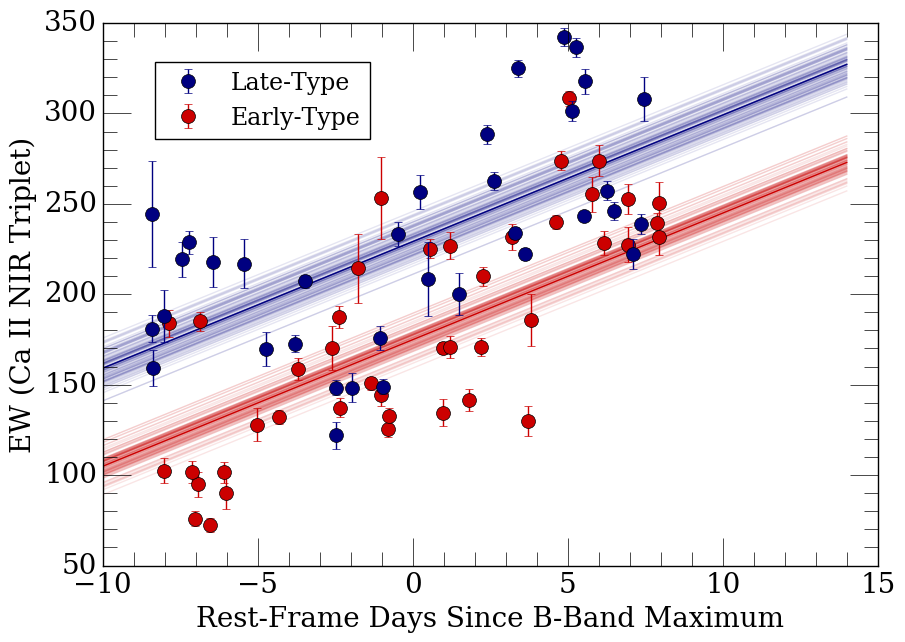

In [119]:
plt.rc('font', family='serif')
plt.figure(num = 1, dpi = 100, figsize = [10,7])
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.xlabel('$\Delta m_{15}$ (B) (mag)', fontsize = 20)
plt.ylabel('B - V (mag)', fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=20)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
for b, lnf in samples_late_c[np.random.randint(len(samples_late_c), size=100)]:
    plt.plot(x, m_c*x+b, color="#000080", alpha=0.1, zorder=-1)
for b, lnf in samples_early_c[np.random.randint(len(samples_early_c), size=100)]:
    plt.plot(x, m_c*x+b, color="#cc0000", alpha=0.1, zorder=-2)
plt.errorbar(phases_late_new, EWs_late, yerr=err_late,  fmt='o', markersize=10, color = "#000080", label='Late-Type', zorder=2)
plt.errorbar(phases_early_new, EWs_early, yerr=err_early,  fmt='o', markersize=10, color = "#cc0000", label='Early-Type', zorder=1)
plt.plot(x,m_c*x + b_mcmc_late_c[0],'#000080', zorder=-.5)
plt.plot(x,m_c*x + b_mcmc_early_c[0],'#cc0000', zorder=-.7)
# plt.xlim(-7,12)
# plt.ylim(50,375)
plt.xlabel("Rest-Frame Days Since B-Band Maximum")
plt.ylabel("EW (Ca II NIR Triplet)")
plt.legend(loc=1, bbox_to_anchor=(-0.12, 0.45, 0.48, 0.5), numpoints=1, fontsize=17)
# plt.savefig('../../../Paper_Drafts/host_composites_updated/ca_EW.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

# Max-High dm15 Matched

In [14]:
# query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.15 and dm15_source < 1.9) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.9))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.15 and dm15_source < 1.5) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.5)) and Supernovae.SN != '2008ia'"]
query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45))"]

In [15]:
# comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='choose_bluest')
comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2004ef-20040914-hst.flm', u'sn2004ef-20040918-hst.flm']
4 questionable spectra removed 54 spectra left
5 Peculiar Ias removed 49 spectra left
39 spectra with host corrections
172 questionable files currently ignored
10 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
10 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm

-0.162779726842
1.34276533441
0.344992531562
1.34267830931


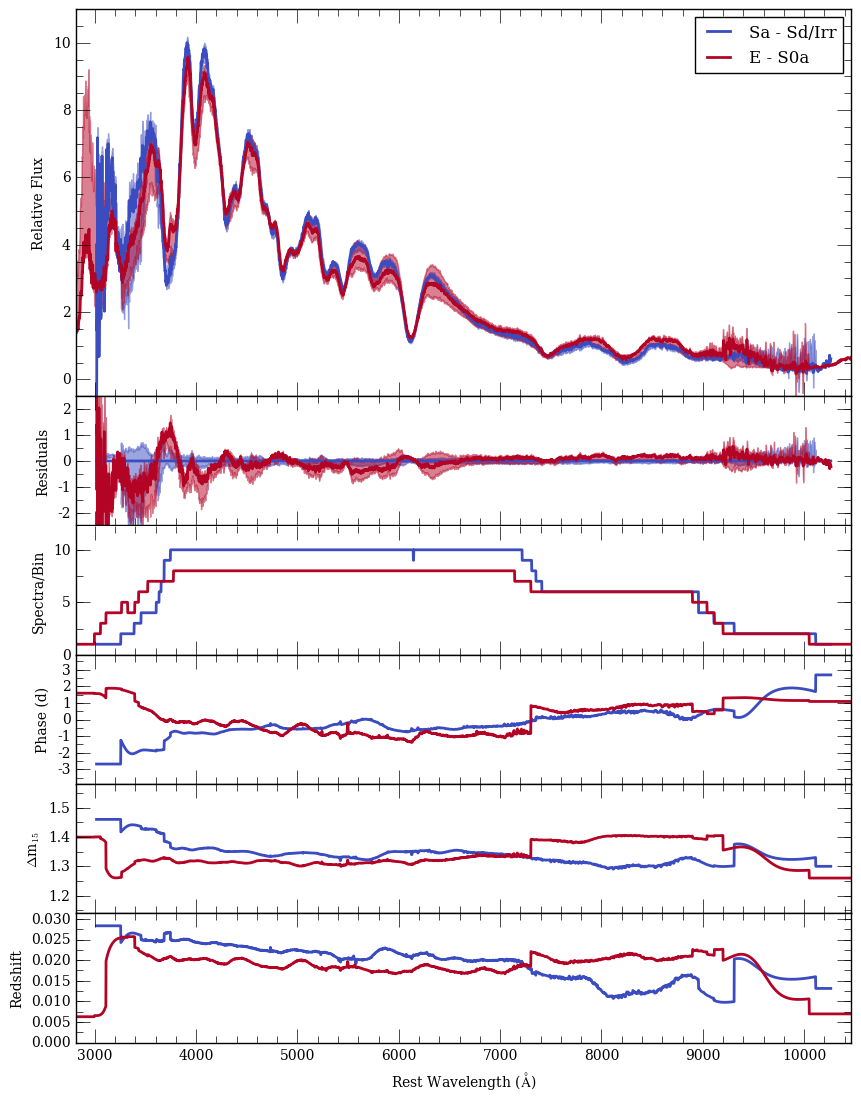

In [16]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], zoom_ratio=True, savename='host_composites_updated/high_dm15_host_max')

# +1 Week-Low dm15 Matched

In [17]:
query_host_low_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [18]:
comps_host_low_dm15_p1week, sn_arrays_low_dm15_p1week, boot_sn_arrays_low_dm15_p1week = query_db.main(len(query_host_low_dm15_p1week), query_host_low_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
1 questionable spectra removed 29 spectra left
0 Peculiar Ias removed 29 spectra left
26 spectra with host corrections
172 questionable files currently ignored
17 valid SNe found
Arrays cleaned
17 spectra may have telluric contamination
17 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
0 questionable spectra removed 11 spectra left
0 Peculia

6.32394186246
1.02985627134
6.83483977494
1.06079003646


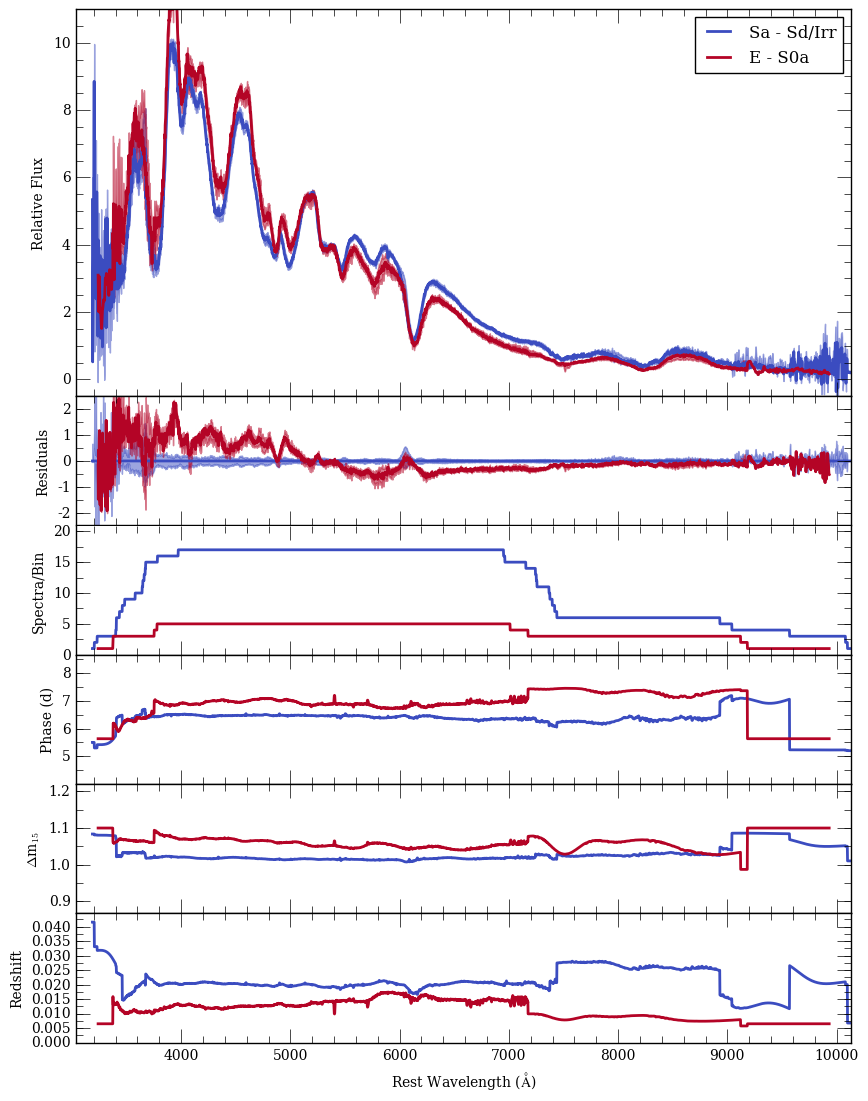

In [19]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_p1week')

# +1 Week-High dm15 Matched

In [20]:
query_host_high_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [21]:
comps_host_high_dm15_p1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_p1week), query_host_high_dm15_p1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 26 spectra left
0 Peculiar Ias removed 26 spectra left
21 spectra with host corrections
172 questionable files currently ignored
8 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
8 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 5 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionable fi

6.92800519464
1.36045603157
7.58052346057
1.38911758851


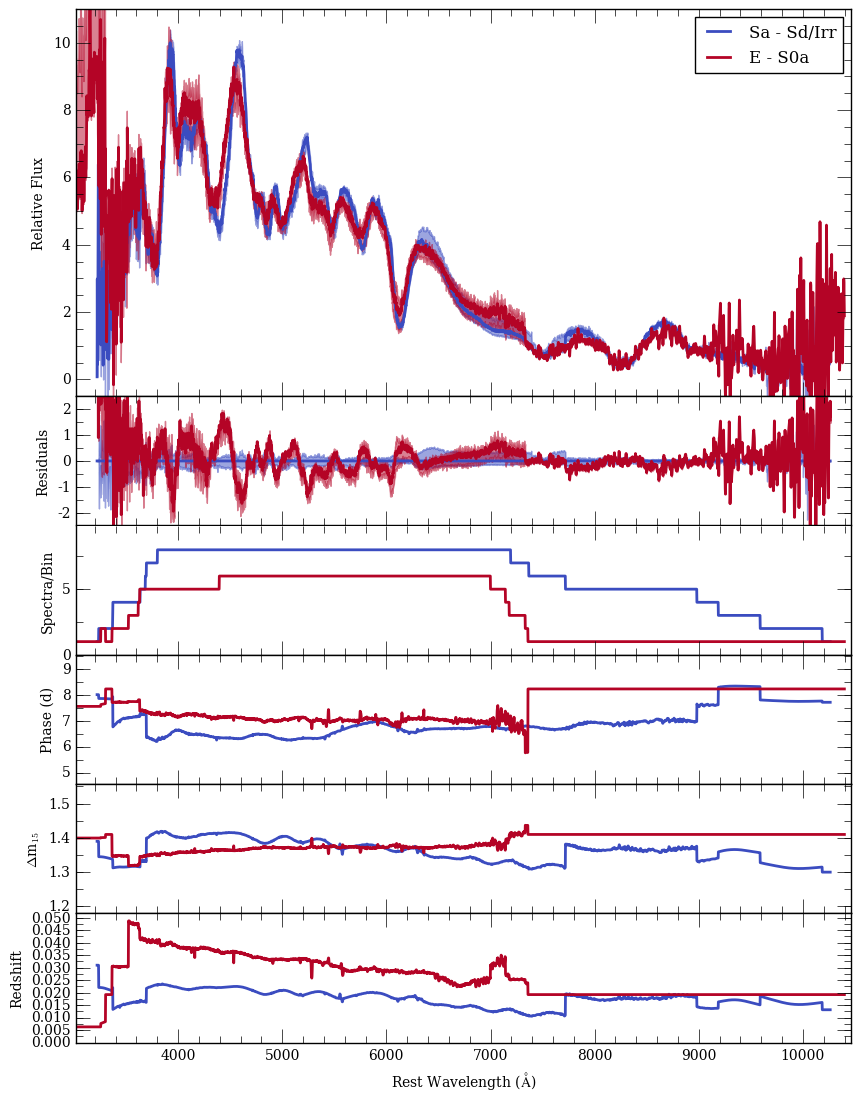

In [22]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_p1week')

# -1 Week-Low dm15 Matched

In [23]:
query_host_low_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [24]:
comps_host_low_dm15_m1week, sn_arrays_low_dm15_m1week, boot_sn_arrays_low_dm15_m1week = query_db.main(len(query_host_low_dm15_m1week), query_host_low_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
172 questionable files currently ignored
2 questionable spectra removed 48 spectra left
0 Peculiar Ias removed 48 spectra left
46 spectra with host corrections
172 questionable files currently ignored
18 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
18 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 3 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -10 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))
172 questionable files currently ignored
Generate variance failed for:  [u'sn2005cf-20050603

-6.80056333422
1.03873962341
-6.46939975844
1.01990214877


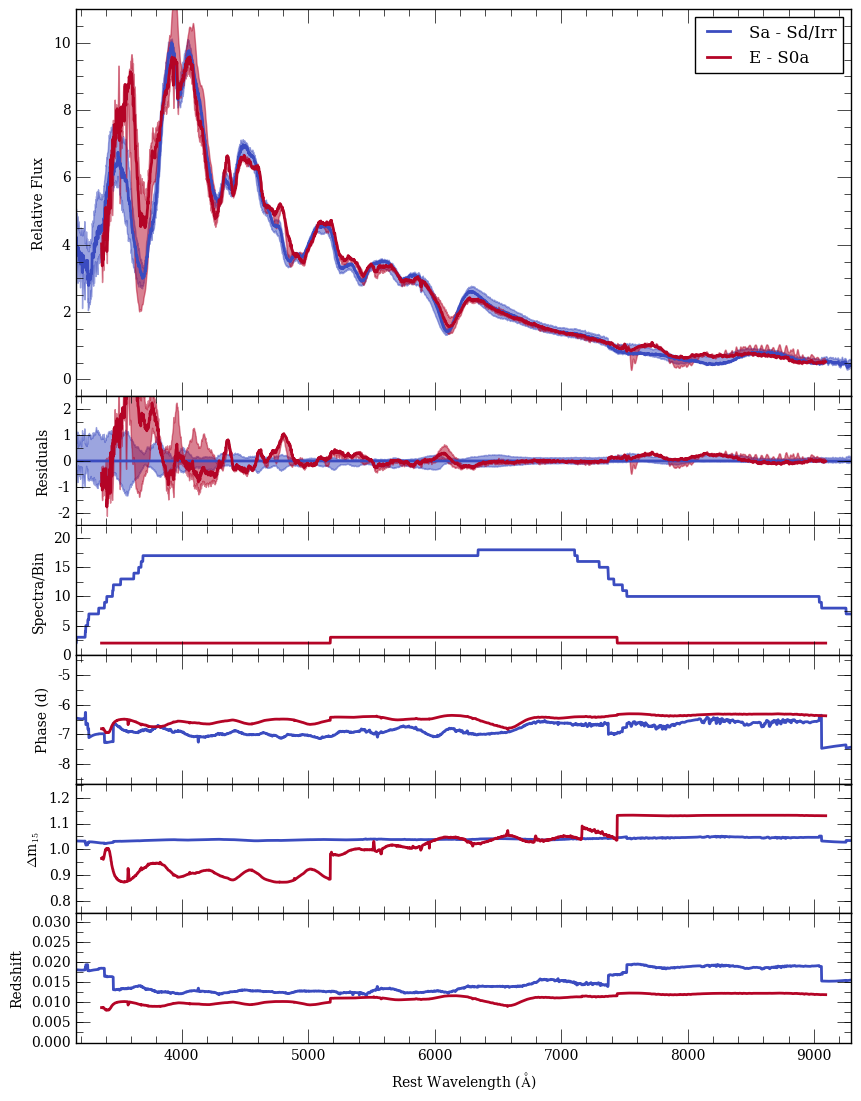

In [25]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_m1week, scale_type=False, min_num_show=2, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/low_dm15_host_m1week')

In [26]:
query_host_high_dm15_m1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [27]:
comps_host_high_dm15_m1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_m1week), query_host_high_dm15_m1week, boot='b', medmean=1, selection='max_coverage', verbose=False, gini_balance=True)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
172 questionable files currently ignored
1 questionable spectra removed 42 spectra left
6 Peculiar Ias removed 36 spectra left
28 spectra with host corrections
172 questionable files currently ignored
9 valid SNe found
Arrays cleaned
1 spectra may have telluric contamination
9 SNs with host corrections
Creating composite...
Gini balancing...
Balanced after 2 iterations
Done.
Bootstrapping
scaling boots...
computing confidence intervals...
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -9 and phase <= -5 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'
172 questionabl

-5.82422884136
1.41953586444
-5.81620661784
1.41581278456


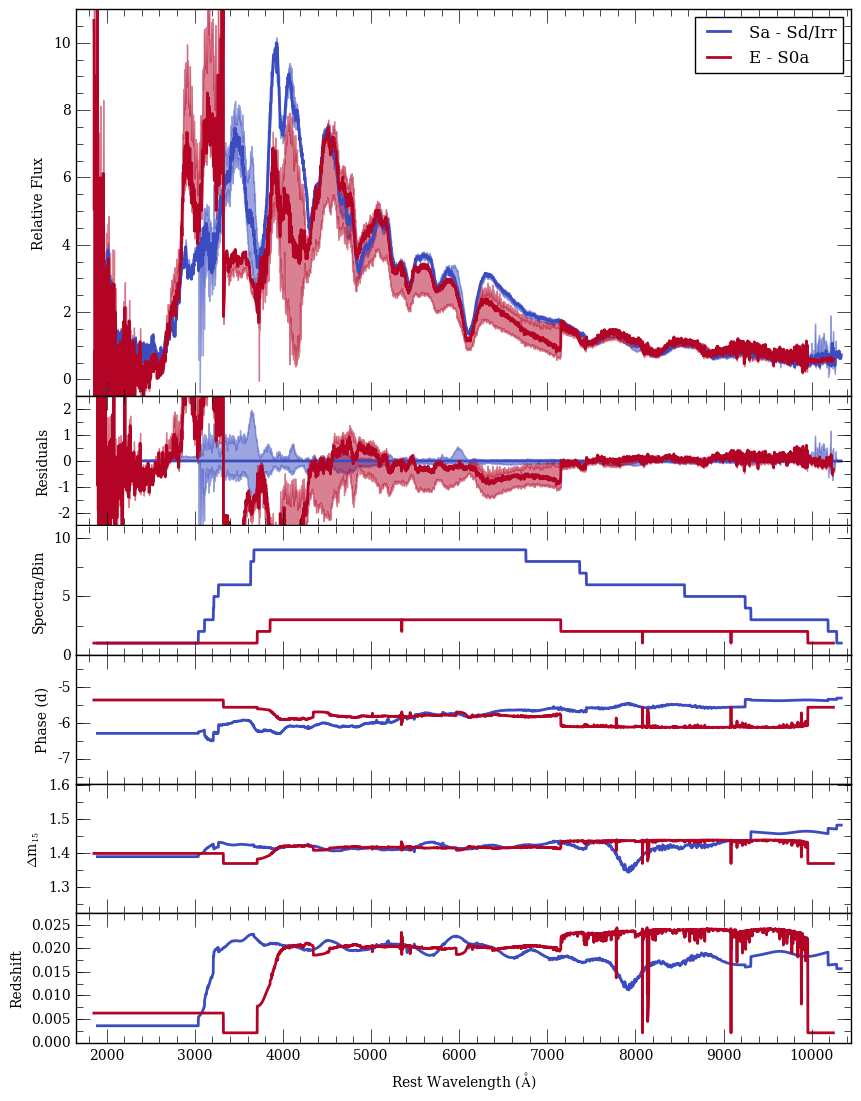

In [29]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_m1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_m1week, scale_type=False, min_num_show=1, min_num_scale=2, legend_labels = ['Sa - Sd/Irr','E - S0a'], savename='host_composites_updated/high_dm15_host_m1week')